# TDS3301 Data Mining - Group Assignment Question 3
## TT3V - Mooncake
### Koh Han Yi (1181302907), Lee Min Xuan (1181302793), Tan Jia Qi (1191301879)
In view of the fact that the COVID-19 pandemic is still serious in Malaysia, this assignment will be doing data analysis on the pandemic . The data used in this assignment is obtained from the “Open Data on COVID-19 in Malaysia” by the Ministry of Health (MOH), Malaysia via https://github.com/MoH-Malaysia/covid19-public.

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats

In [2]:
from boruta import BorutaPy
from tqdm import tqdm_notebook, tqdm
from IPython.display import Image, display  
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn import preprocessing 
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score,median_absolute_error,mean_squared_error,mean_absolute_error,accuracy_score

# Define Path for Dataset & Variable Initialization

In [3]:
malaysia_case_dir = './dataset/cases_malaysia.csv'
state_case_dir = "./dataset/cases_state.csv"
checkIn_dir = "./dataset/checkin_state.csv"
clusters_dir = "./dataset/clusters.csv"
hospital_dir = "./dataset/hospital.csv"
pkrc_dir = "./dataset/pkrc.csv"
malaysia_tests_dir = "./dataset/tests_malaysia.csv"
states_tests_dir = "./dataset/tests_state.csv"

**Time frame is set from 1/7/2021 until 31/8/2021** 
</p> This is because the tests_state dataset on MOH only has data available from 1st of July 2021 to 21st of September 2021. Also, the recent data is more helpful to predict future new Covid-19 cases in Malaysia since the data from 2020 to 2021 is having big differences within short time period. 

In [4]:
start_date = "2021-07-01"
end_date = "2021-08-31"

# <font color='FireBrick'>Question 3 (i)</font> 

## Exploratory Data Analysis (EDA)

Perform EDA by identifying missing value using isna() function, and outliers using box plot, we did not remove outliers because there are important to the datasets and statistically significant.

### Exploratory Data Analysis for Malaysia Case Dataset

In [5]:
malaysia_case_df = pd.read_csv(malaysia_case_dir)
after_start_date = malaysia_case_df["date"] >= start_date
before_end_date = malaysia_case_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
malaysia_case_df = malaysia_case_df.loc[between_two_dates]
malaysia_case_df.head()

,date,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
523,2021-07-01,6988,5,5580,0.0,0.0,305.0,41.0,23.0,209.0,1341.0
524,2021-07-02,6982,3,6278,0.0,10.0,339.0,99.0,2.0,13.0,1358.0
525,2021-07-03,6658,11,5677,0.0,0.0,244.0,13.0,3.0,187.0,1152.0
526,2021-07-04,6045,20,5271,0.0,7.0,297.0,73.0,10.0,34.0,1121.0
527,2021-07-05,6387,26,4532,0.0,0.0,350.0,55.0,0.0,40.0,1182.0


In [6]:
malaysia_case_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 523 to 584
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     62 non-null     object 
 1   cases_new                62 non-null     int64  
 2   cases_import             62 non-null     int64  
 3   cases_recovered          62 non-null     int64  
 4   cluster_import           62 non-null     float64
 5   cluster_religious        62 non-null     float64
 6   cluster_community        62 non-null     float64
 7   cluster_highRisk         62 non-null     float64
 8   cluster_education        62 non-null     float64
 9   cluster_detentionCentre  62 non-null     float64
 10  cluster_workplace        62 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 5.8+ KB


In [7]:
malaysia_case_df.describe()

,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,16036.693548,16.709677,12565.241935,0.193548,10.935484,507.919355,68.500000,21.467742,117.548387,1271.483871
std,5344.138169,12.175475,5830.184317,1.128450,14.078085,136.033903,34.836268,20.246609,81.127844,273.556105
min,6045.000000,0.000000,4532.000000,0.000000,0.000000,244.000000,13.000000,0.000000,13.000000,734.000000
25%,11709.750000,7.250000,6392.500000,0.000000,2.000000,416.000000,41.250000,5.500000,63.500000,1072.500000
50%,17160.000000,13.500000,12238.000000,0.000000,6.000000,494.000000,66.000000,16.500000,93.500000,1246.000000
75%,20591.750000,25.000000,17679.000000,0.000000,15.750000,597.750000,84.000000,29.750000,173.500000,1461.000000
max,24599.000000,58.000000,22657.000000,8.000000,88.000000,825.000000,189.000000,92.000000,369.000000,2135.000000


In [8]:
nRow, nCol = malaysia_case_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 62 rows and 11 columns


In [9]:
missing_values_df = malaysia_case_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

,Count of Missing Values
date,0
cases_new,0
cases_import,0
cases_recovered,0
cluster_import,0
cluster_religious,0
cluster_community,0
cluster_highRisk,0
cluster_education,0
cluster_detentionCentre,0


##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

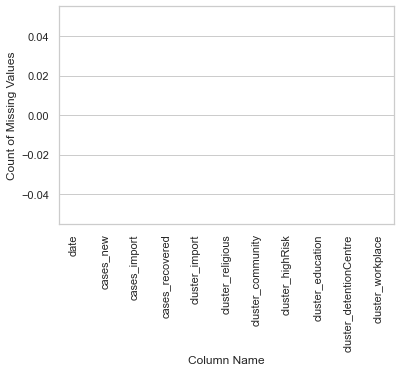

In [10]:
missing_values = malaysia_case_df.isnull().sum() / len(malaysia_case_df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values.columns = ['Count of Missing Values']
missing_values.index.names = ['Name']
missing_values['Column Name'] = malaysia_case_df.columns


sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Column Name', y = 'Count of Missing Values', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

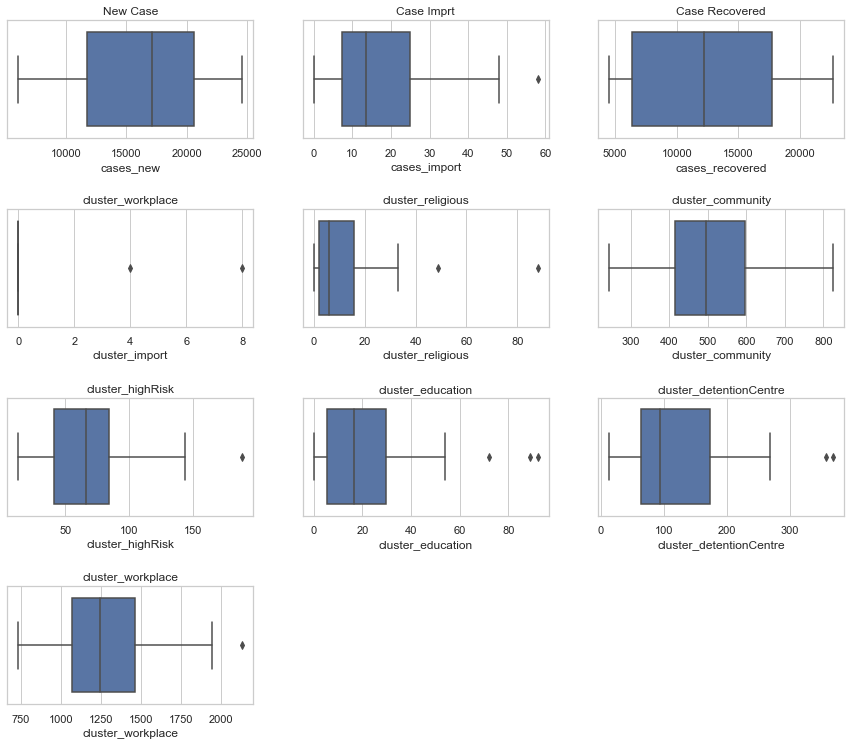

In [11]:
fig, axes = plt.subplots(4, 3, figsize=(15, 5), sharey=True)
# fig.suptitle('Outliers Visualization')
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cases_new"],ax=axes[0][0])
axes[0][0].set_title('New Case')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cases_import"],ax=axes[0][1])
axes[0][1].set_title('Case Imprt')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cases_recovered"],ax=axes[0][2])
axes[0][2].set_title('Case Recovered')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_import"],ax=axes[1][0])
axes[1][0].set_title('cluster_workplace')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_religious"],ax=axes[1][1])
axes[1][1].set_title('cluster_religious')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_community"],ax=axes[1][2])
axes[1][2].set_title('cluster_community')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_highRisk"],ax=axes[2][0])
axes[2][0].set_title('cluster_highRisk')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_education"],ax=axes[2][1])
axes[2][1].set_title('cluster_education')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_detentionCentre"],ax=axes[2][2])
axes[2][2].set_title('cluster_detentionCentre')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_workplace"],ax=axes[3][0])
axes[3][0].set_title('cluster_workplace')

fig.delaxes(axes[3][1])
fig.delaxes(axes[3][2])

### Exploratory Data Analysis for State Case Dataset

In [12]:
state_case_df = pd.read_csv(state_case_dir)
after_start_date = state_case_df["date"] >= start_date
before_end_date = state_case_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
state_case_df = state_case_df.loc[between_two_dates]
state_case_df.head()

,date,state,cases_import,cases_new,cases_recovered
8368,2021-07-01,Johor,1,270,361
8369,2021-07-01,Kedah,0,250,186
8370,2021-07-01,Kelantan,0,108,208
8371,2021-07-01,Melaka,0,311,317
8372,2021-07-01,Negeri Sembilan,0,692,883


In [13]:
state_case_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 8368 to 9359
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             992 non-null    object
 1   state            992 non-null    object
 2   cases_import     992 non-null    int64 
 3   cases_new        992 non-null    int64 
 4   cases_recovered  992 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 46.5+ KB


In [14]:
state_case_df.describe()

,cases_import,cases_new,cases_recovered
count,992.000000,992.000000,992.000000
mean,1.044355,1002.293347,785.327621
std,3.885865,1427.354131,1271.117746
min,0.000000,0.000000,0.000000
25%,0.000000,206.750000,128.750000
50%,0.000000,570.500000,415.500000
75%,0.000000,1216.000000,830.500000
max,55.000000,8792.000000,8801.000000


In [15]:
state_case_df.groupby([state_case_df['date']]).sum()

,cases_import,cases_new,cases_recovered
date,,,
2021-07-01,5,6988,5580
2021-07-02,3,6982,6278
2021-07-03,11,6658,5677
2021-07-04,20,6045,5271
2021-07-05,26,6387,4532
...,...,...,...
2021-08-27,15,22070,21877
2021-08-28,12,22597,19492
2021-08-29,7,20579,20845


In [16]:
missing_values_df = state_case_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

,Count of Missing Values
date,0
state,0
cases_import,0
cases_new,0
cases_recovered,0


##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

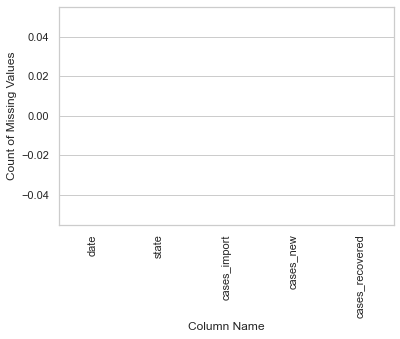

In [17]:
missing_values = state_case_df.isnull().sum() / len(state_case_df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values.columns = ['Count of Missing Values']
missing_values.index.names = ['Name']
missing_values['Column Name'] = state_case_df.columns

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Column Name', y = 'Count of Missing Values', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

Text(0.5, 1.0, 'Recovered Case')

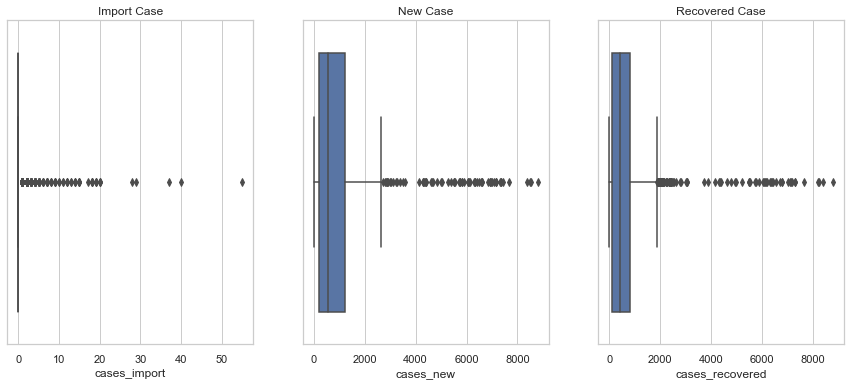

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=1, wspace=0.2, hspace=0.6)

sns.boxplot(data=state_case_df,x=state_case_df["cases_import"],ax=axes[0])
axes[0].set_title('Import Case')
sns.boxplot(data=state_case_df,x=state_case_df["cases_new"],ax=axes[1])
axes[1].set_title('New Case')
sns.boxplot(data=state_case_df,x=state_case_df["cases_recovered"],ax=axes[2])
axes[2].set_title('Recovered Case')

### Exploratory Data Analysis for Clusters Dataset

In [19]:
clusters_df = pd.read_csv(clusters_dir)
after_start_date = clusters_df["date_announced"] >= start_date
before_end_date = clusters_df["date_announced"] <= end_date
between_two_dates = after_start_date & before_end_date
clusters_df = clusters_df.loc[between_two_dates]
clusters_df['date'] = clusters_df.date_announced
clusters_df.head()

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,date
2845,Kluster Industri Perusahaan Selesa Jaya,Selangor,Hulu Langat,2021-07-01,2021-06-30,workplace,ended,0,13,0,67,0,0,13,2021-07-01
2846,Kluster Kampung Bagus,Kelantan,Pasir Mas,2021-07-01,2021-06-30,community,ended,0,8,0,14,0,0,8,2021-07-01
2847,Kluster Taman SP Mahang,Kelantan,Kota Bharu,2021-07-01,2021-06-30,community,ended,0,8,0,14,0,0,8,2021-07-01
2848,Kluster Dah Tanjung Setol,Kedah,Pendang,2021-07-01,2021-06-30,community,ended,0,31,0,61,0,0,31,2021-07-01
2849,Kluster Kampung Redang Gunong,Kelantan,"Bachok, Kota Bharu, Tanah Merah",2021-07-01,2021-07-01,community,ended,0,10,0,19,0,0,10,2021-07-01


In [20]:
clusters_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 2845 to 4730
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cluster          1886 non-null   object
 1   state            1886 non-null   object
 2   district         1886 non-null   object
 3   date_announced   1886 non-null   object
 4   date_last_onset  1886 non-null   object
 5   category         1886 non-null   object
 6   status           1886 non-null   object
 7   cases_new        1886 non-null   int64 
 8   cases_total      1886 non-null   int64 
 9   cases_active     1886 non-null   int64 
 10  tests            1886 non-null   int64 
 11  icu              1886 non-null   int64 
 12  deaths           1886 non-null   int64 
 13  recovered        1886 non-null   int64 
 14  date             1886 non-null   object
dtypes: int64(7), object(8)
memory usage: 235.8+ KB


In [21]:
clusters_df.describe()

,cases_new,cases_total,cases_active,tests,icu,deaths,recovered
count,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000
mean,0.166490,77.528102,10.995758,235.092259,0.020148,0.398197,66.133616
std,2.442736,116.985016,36.605851,403.282586,0.144271,1.329916,103.774849
min,0.000000,5.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,49.000000,0.000000,0.000000,17.000000
50%,0.000000,42.000000,0.000000,107.500000,0.000000,0.000000,34.000000
75%,0.000000,84.000000,5.000000,250.750000,0.000000,0.000000,73.000000
max,75.000000,1645.000000,755.000000,5820.000000,2.000000,25.000000,1643.000000


In [22]:
cluster_count_by_state = clusters_df.groupby([clusters_df['state']]).count().loc[['Johor','Pahang','Kedah','Selangor']]['cluster']
clusters_df = clusters_df.groupby([clusters_df['state']]).sum().loc[['Johor','Pahang','Kedah','Selangor']]
clusters_df['cluster_total'] = cluster_count_by_state

In [23]:
missing_values_df = clusters_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

,Count of Missing Values
cases_new,0
cases_total,0
cases_active,0
tests,0
icu,0
deaths,0
recovered,0
cluster_total,0


##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

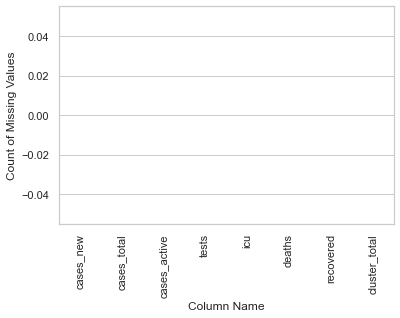

In [24]:
missing_values = clusters_df.isnull().sum() / len(clusters_df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values.columns = ['Count of Missing Values']
missing_values.index.names = ['Name']
missing_values['Column Name'] = clusters_df.columns

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Column Name', y = 'Count of Missing Values', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

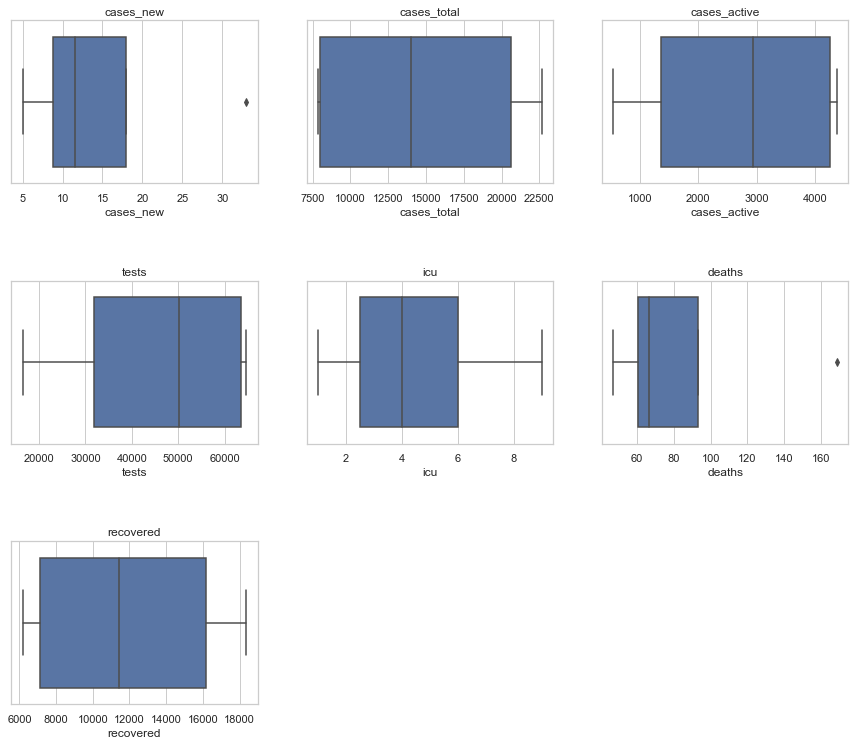

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(15, 5), sharey=True)
# fig.suptitle('Outliers Visualization')
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=clusters_df,x=clusters_df["cases_new"],ax=axes[0][0])
axes[0][0].set_title('cases_new')

sns.boxplot(data=clusters_df,x=clusters_df["cases_total"],ax=axes[0][1])
axes[0][1].set_title('cases_total')

sns.boxplot(data=clusters_df,x=clusters_df["cases_active"],ax=axes[0][2])
axes[0][2].set_title('cases_active')

sns.boxplot(data=clusters_df,x=clusters_df["tests"],ax=axes[1][0])
axes[1][0].set_title('tests')

sns.boxplot(data=clusters_df,x=clusters_df["icu"],ax=axes[1][1])
axes[1][1].set_title('icu')

sns.boxplot(data=clusters_df,x=clusters_df["deaths"],ax=axes[1][2])
axes[1][2].set_title('deaths')

sns.boxplot(data=clusters_df,x=clusters_df["recovered"],ax=axes[2][0])
axes[2][0].set_title('recovered')
fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])

### Exploratory Data Analysis for Malaysia Tests Dataset

In [26]:
malaysia_tests_df = pd.read_csv(malaysia_tests_dir)
after_start_date = malaysia_tests_df["date"] >= start_date
before_end_date = malaysia_tests_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
malaysia_tests_df = malaysia_tests_df.loc[between_two_dates]
malaysia_tests_df.head()

,date,rtk-ag,pcr
524,2021-07-01,43219,54811
525,2021-07-02,40860,55642
526,2021-07-03,30817,55023
527,2021-07-04,26064,42657
528,2021-07-05,44941,41819


In [27]:
malaysia_tests_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 524 to 585
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   rtk-ag  62 non-null     int64 
 2   pcr     62 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


In [28]:
malaysia_tests_df.describe()

,rtk-ag,pcr
count,62.00000,62.000000
mean,69147.66129,68683.677419
std,18475.25760,11299.659488
min,26064.00000,41819.000000
25%,54739.75000,59948.750000
50%,72232.50000,70748.000000
75%,83276.00000,75953.750000
max,96219.00000,90293.000000


In [29]:
missing_values_df = malaysia_tests_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

,Count of Missing Values
date,0
rtk-ag,0
pcr,0


##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

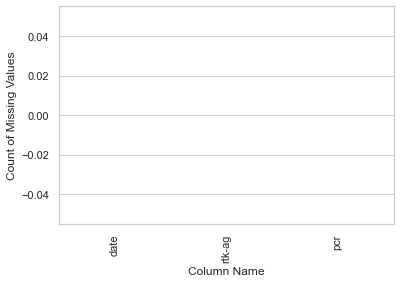

In [30]:
missing_values = malaysia_tests_df.isnull().sum() / len(malaysia_tests_df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values.columns = ['Count of Missing Values']
missing_values.index.names = ['Name']
missing_values['Column Name'] = malaysia_tests_df.columns

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Column Name', y = 'Count of Missing Values', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

Text(0.5, 1.0, 'pcr')

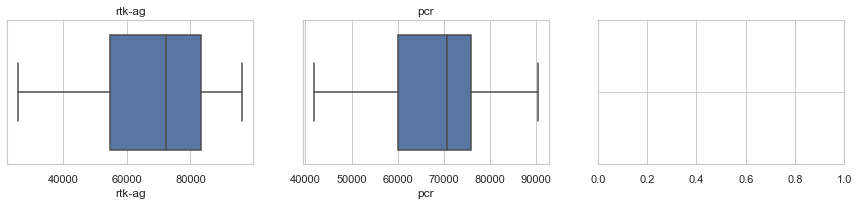

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=0.5, wspace=0.2, hspace=0.6)

sns.boxplot(data=malaysia_tests_df, x = malaysia_tests_df["rtk-ag"],ax=axes[0])
axes[0].set_title('rtk-ag')

sns.boxplot(data=malaysia_tests_df,x = malaysia_tests_df["pcr"],ax=axes[1])
axes[1].set_title('pcr')

### Exploratory Data Analysis for State Tests Dataset

In [32]:
states_tests_df = pd.read_csv(states_tests_dir)
after_start_date = states_tests_df["date"] >= start_date
before_end_date = states_tests_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
states_tests_df = states_tests_df.loc[between_two_dates]
states_tests_df.head()

,date,state,rtk-ag,pcr
0,2021-07-01,Johor,2749,3670
1,2021-07-01,Kedah,2073,1297
2,2021-07-01,Kelantan,1348,1966
3,2021-07-01,Melaka,1049,2132
4,2021-07-01,Negeri Sembilan,2151,3306


In [33]:
states_tests_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 991
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    992 non-null    object
 1   state   992 non-null    object
 2   rtk-ag  992 non-null    int64 
 3   pcr     992 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 38.8+ KB


In [34]:
states_tests_df.describe()

,rtk-ag,pcr
count,992.000000,992.000000
mean,4321.728831,4292.729839
std,6006.077856,4202.906254
min,9.000000,13.000000
25%,1217.250000,1668.250000
50%,2528.000000,3286.500000
75%,4806.250000,5260.500000
max,41143.000000,23350.000000


In [35]:
missing_values_df = states_tests_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

,Count of Missing Values
date,0
state,0
rtk-ag,0
pcr,0


##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

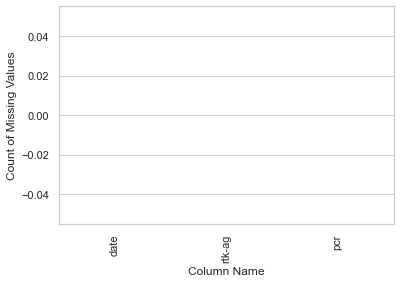

In [36]:
missing_values = malaysia_tests_df.isnull().sum() / len(malaysia_tests_df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values.columns = ['Count of Missing Values']
missing_values.index.names = ['Name']
missing_values['Column Name'] = malaysia_tests_df.columns

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Column Name', y = 'Count of Missing Values', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

Text(0.5, 1.0, 'pcr')

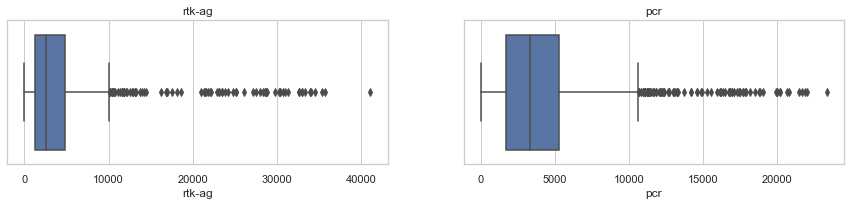

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
# fig.suptitle('Outliers Visualization')
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=0.5, wspace=0.2, hspace=0.6)

sns.boxplot(data=states_tests_df, x = states_tests_df["rtk-ag"],ax=axes[0])
axes[0].set_title('rtk-ag')

sns.boxplot(data=states_tests_df,x = states_tests_df["pcr"],ax=axes[1])
axes[1].set_title('pcr')

### Exploratory Data Analysis for PKRC Dataset

In [38]:
pkrc_df = pd.read_csv(pkrc_dir)
after_start_date = pkrc_df["date"] >= start_date
before_end_date = pkrc_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
pkrc_df = pkrc_df.loc[between_two_dates]
pkrc_df.head()

,date,state,beds,admitted_pui,admitted_covid,admitted_total,discharge_pui,discharge_covid,discharge_total,pkrc_covid,pkrc_pui,pkrc_noncovid
5163,2021-07-01,Johor,2321,0,103,103,0,152,152,964,0,0
5164,2021-07-01,Kedah,540,0,71,71,0,55,55,348,0,0
5165,2021-07-01,Kelantan,2763,11,96,107,9,133,142,638,73,0
5166,2021-07-01,Melaka,1662,0,181,181,0,95,95,886,0,0
5167,2021-07-01,Negeri Sembilan,2395,0,191,191,0,98,98,1248,0,0


In [39]:
pkrc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 5163 to 6030
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             868 non-null    object
 1   state            868 non-null    object
 2   beds             868 non-null    int64 
 3   admitted_pui     868 non-null    int64 
 4   admitted_covid   868 non-null    int64 
 5   admitted_total   868 non-null    int64 
 6   discharge_pui    868 non-null    int64 
 7   discharge_covid  868 non-null    int64 
 8   discharge_total  868 non-null    int64 
 9   pkrc_covid       868 non-null    int64 
 10  pkrc_pui         868 non-null    int64 
 11  pkrc_noncovid    868 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 88.2+ KB


In [40]:
pkrc_df.describe()

,beds,admitted_pui,admitted_covid,admitted_total,discharge_pui,discharge_covid,discharge_total,pkrc_covid,pkrc_pui,pkrc_noncovid
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000
mean,2615.232719,6.188940,193.182028,199.370968,4.858295,176.866359,181.724654,1417.392857,53.918203,14.052995
std,1999.143695,13.886881,170.680034,175.043789,13.741961,171.242991,173.891869,1139.694369,103.075605,60.242910
min,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1290.750000,0.000000,70.000000,72.000000,0.000000,52.750000,54.000000,469.250000,0.000000,0.000000
50%,2104.000000,0.000000,151.000000,153.000000,0.000000,127.500000,131.000000,1030.000000,6.000000,0.000000
75%,3261.000000,6.000000,275.750000,288.500000,4.000000,263.000000,275.750000,2315.250000,56.000000,0.000000
max,8696.000000,168.000000,1187.000000,1207.000000,180.000000,1077.000000,1077.000000,5476.000000,729.000000,1255.000000


In [41]:
missing_values_df = pkrc_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

,Count of Missing Values
date,0
state,0
beds,0
admitted_pui,0
admitted_covid,0
admitted_total,0
discharge_pui,0
discharge_covid,0
discharge_total,0
pkrc_covid,0


##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

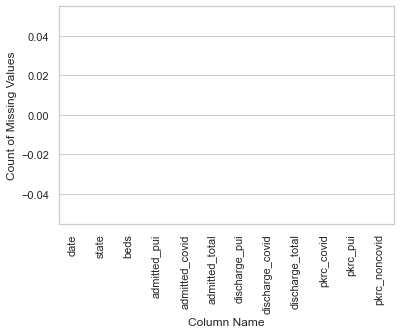

In [42]:
missing_values = pkrc_df.isnull().sum() / len(pkrc_df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values.columns = ['Count of Missing Values']
missing_values.index.names = ['Name']
missing_values['Column Name'] = pkrc_df.columns

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Column Name', y = 'Count of Missing Values', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

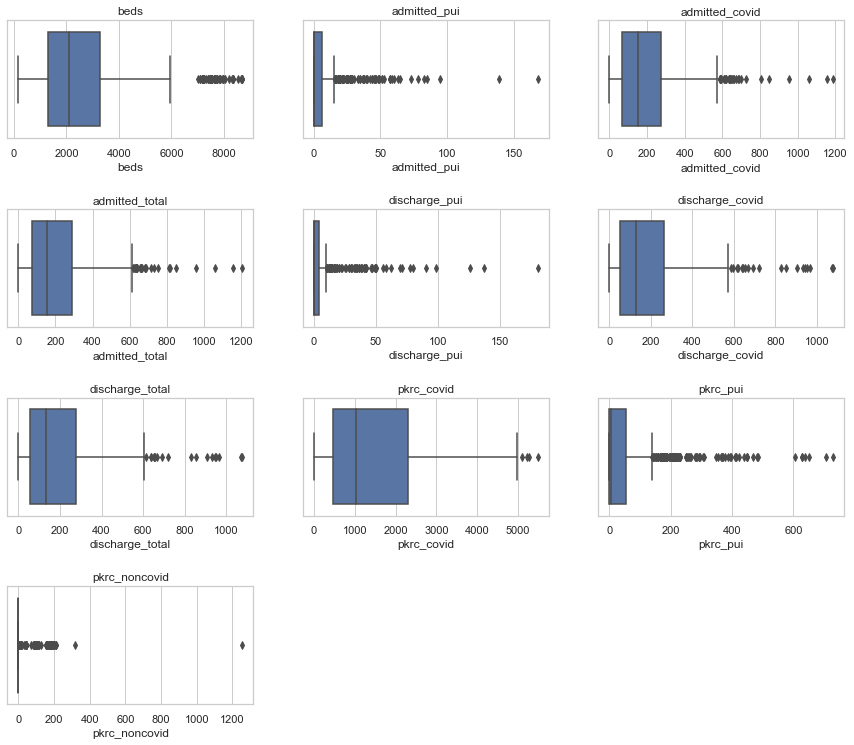

In [43]:
fig, axes = plt.subplots(4, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=pkrc_df, x = pkrc_df["beds"],ax=axes[0][0])
axes[0][0].set_title('beds')
sns.boxplot(data=pkrc_df,x = pkrc_df["admitted_pui"],ax=axes[0][1])
axes[0][1].set_title('admitted_pui')
sns.boxplot(data=pkrc_df, x = pkrc_df["admitted_covid"],ax=axes[0][2])
axes[0][2].set_title("admitted_covid")
sns.boxplot(data=pkrc_df,x = pkrc_df["admitted_total"],ax=axes[1][0])
axes[1][0].set_title('admitted_total')
sns.boxplot(data=pkrc_df, x = pkrc_df["discharge_pui"],ax=axes[1][1])
axes[1][1].set_title('discharge_pui')
sns.boxplot(data=pkrc_df,x = pkrc_df["discharge_covid"],ax=axes[1][2])
axes[1][2].set_title('discharge_covid')
sns.boxplot(data=pkrc_df, x = pkrc_df["discharge_total"],ax=axes[2][0])
axes[2][0].set_title('discharge_total')
sns.boxplot(data=pkrc_df,x = pkrc_df["pkrc_covid"],ax=axes[2][1])
axes[2][1].set_title('pkrc_covid')
sns.boxplot(data=pkrc_df, x = pkrc_df["pkrc_pui"],ax=axes[2][2])
axes[2][2].set_title('pkrc_pui')
sns.boxplot(data=pkrc_df,x = pkrc_df["pkrc_noncovid"],ax=axes[3][0])
axes[3][0].set_title('pkrc_noncovid')

fig.delaxes(axes[3][1])
fig.delaxes(axes[3][2])

### Exploratory Data Analaysis for Mysejahtera CheckIn Dataset

In [44]:
checkIn_df = pd.read_csv(checkIn_dir)
after_start_date = checkIn_df["date"] >= start_date
before_end_date = checkIn_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
checkIn_df = checkIn_df.loc[between_two_dates]
checkIn_df.head()

,date,state,checkins,unique_ind,unique_loc
3392,2021-07-01,Johor,2093025,1046923,80161
3393,2021-07-01,Kedah,764979,423792,35235
3394,2021-07-01,Kelantan,302379,172269,21977
3395,2021-07-01,Melaka,490636,257934,20042
3396,2021-07-01,Negeri Sembilan,596917,314375,22793


In [45]:
checkIn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 3392 to 4383
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        992 non-null    object
 1   state       992 non-null    object
 2   checkins    992 non-null    int64 
 3   unique_ind  992 non-null    int64 
 4   unique_loc  992 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 46.5+ KB


In [46]:
checkIn_df.describe()

,checkins,unique_ind,unique_loc
count,9.920000e+02,9.920000e+02,992.000000
mean,1.131953e+06,5.583087e+05,38258.386089
std,1.090926e+06,5.507102e+05,31122.174494
min,2.741600e+04,1.532600e+04,779.000000
25%,3.208090e+05,1.804750e+05,17987.000000
50%,7.323920e+05,3.745795e+05,32091.500000
75%,1.508238e+06,6.425605e+05,54459.250000
max,5.312835e+06,2.571037e+06,159863.000000


In [47]:
missing_values_df = checkIn_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

,Count of Missing Values
date,0
state,0
checkins,0
unique_ind,0
unique_loc,0


##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

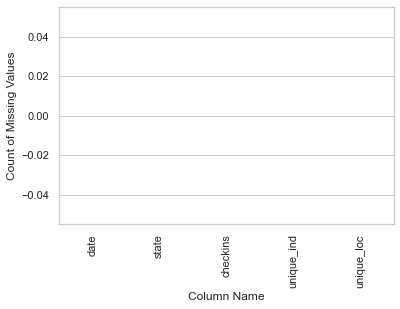

In [48]:
missing_values = checkIn_df.isnull().sum() / len(checkIn_df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values.columns = ['Count of Missing Values']
missing_values.index.names = ['Name']
missing_values['Column Name'] = checkIn_df.columns

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Column Name', y = 'Count of Missing Values', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

Text(0.5, 1.0, 'unique_loc')

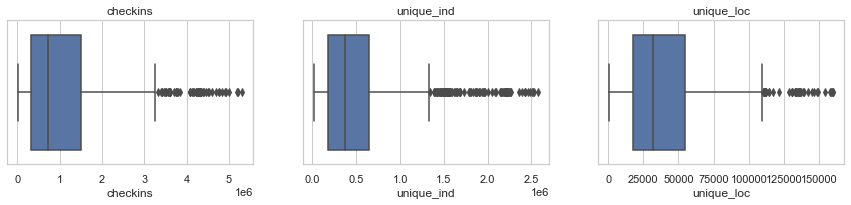

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=0.5, wspace=0.2, hspace=0.6)

sns.boxplot(data=checkIn_df, x = checkIn_df["checkins"],ax=axes[0])
axes[0].set_title('checkins')
sns.boxplot(data=checkIn_df,x = checkIn_df["unique_ind"],ax=axes[1])
axes[1].set_title('unique_ind')
sns.boxplot(data=checkIn_df, x = checkIn_df["unique_loc"],ax=axes[2])
axes[2].set_title('unique_loc')

#### Exploratory Data Analysis for Hospital Dataset

In [50]:
hospital_df = pd.read_csv(hospital_dir)
after_start_date = hospital_df["date"] >= start_date
before_end_date = hospital_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
hospital_df = hospital_df.loc[between_two_dates]
hospital_df.head()

,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
7011,2021-07-01,Johor,5090,1535,4903,178,131,309,130,117,247,732,233,3051
7012,2021-07-01,Kedah,2755,661,2639,1,70,71,0,32,32,338,2,1650
7013,2021-07-01,Kelantan,2737,559,2593,13,59,72,14,49,63,297,18,1439
7014,2021-07-01,Melaka,1101,290,987,18,56,74,10,40,50,397,23,579
7015,2021-07-01,Negeri Sembilan,1431,1084,1366,6,147,153,4,96,100,861,12,456


In [51]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 7011 to 8002
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              992 non-null    object
 1   state             992 non-null    object
 2   beds              992 non-null    int64 
 3   beds_covid        992 non-null    int64 
 4   beds_noncrit      992 non-null    int64 
 5   admitted_pui      992 non-null    int64 
 6   admitted_covid    992 non-null    int64 
 7   admitted_total    992 non-null    int64 
 8   discharged_pui    992 non-null    int64 
 9   discharged_covid  992 non-null    int64 
 10  discharged_total  992 non-null    int64 
 11  hosp_covid        992 non-null    int64 
 12  hosp_pui          992 non-null    int64 
 13  hosp_noncovid     992 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 116.2+ KB


In [52]:
hospital_df.describe()

,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,2578.852823,997.365927,2447.864919,28.313508,121.756048,150.069556,20.640121,94.758065,115.398185,746.093750,73.986895,1080.698589
std,1731.927256,955.364124,1644.444511,40.403808,132.212924,160.858150,31.286646,106.786375,129.582936,838.773968,90.789779,694.907817
min,122.000000,25.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1307.000000,426.000000,1220.500000,4.000000,33.750000,43.000000,1.000000,25.000000,30.000000,254.000000,14.000000,531.000000
50%,2457.000000,812.000000,2349.500000,11.000000,76.000000,90.000000,7.500000,55.500000,68.500000,471.500000,35.000000,977.000000
75%,3699.000000,1165.000000,3517.000000,26.000000,159.000000,181.250000,19.250000,117.000000,128.250000,908.250000,89.500000,1532.250000
max,6568.000000,4713.000000,6164.000000,198.000000,748.000000,797.000000,236.000000,613.000000,721.000000,4218.000000,386.000000,3069.000000


In [53]:
missing_values_df = hospital_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

,Count of Missing Values
date,0
state,0
beds,0
beds_covid,0
beds_noncrit,0
admitted_pui,0
admitted_covid,0
admitted_total,0
discharged_pui,0
discharged_covid,0


##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

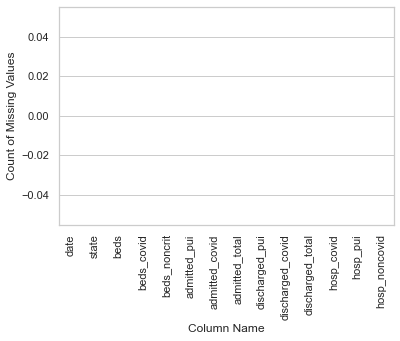

In [54]:
missing_values = hospital_df.isnull().sum() / len(hospital_df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values.columns = ['Count of Missing Values']
missing_values.index.names = ['Name']
missing_values['Column Name'] = hospital_df.columns

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Column Name', y = 'Count of Missing Values', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

Text(0.5, 1.0, 'hosp_noncovid')

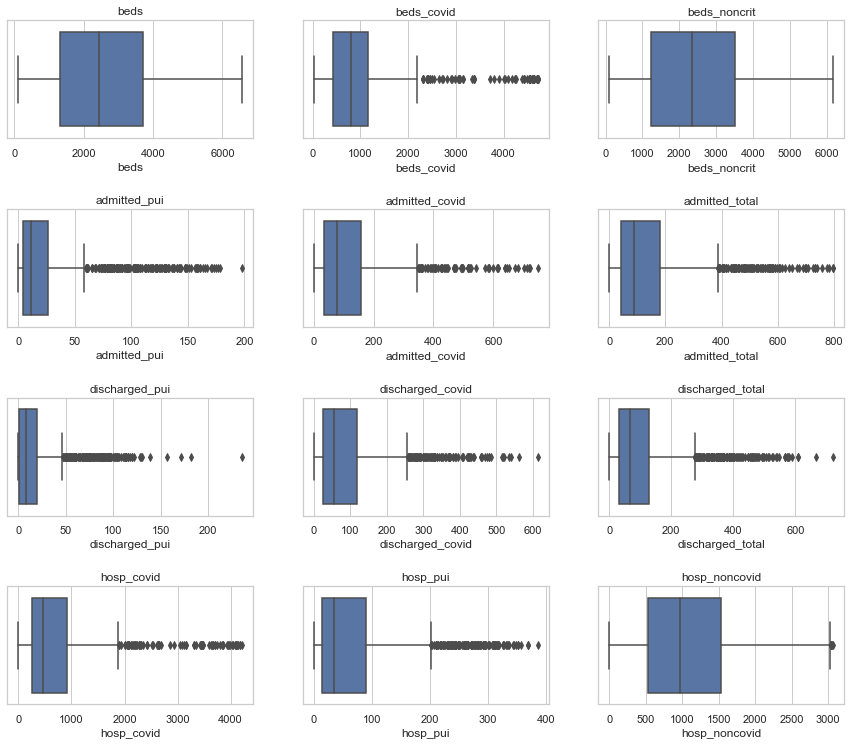

In [55]:
fig, axes = plt.subplots(4, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=hospital_df, x = hospital_df["beds"],ax=axes[0][0])
axes[0][0].set_title('beds')
sns.boxplot(data=hospital_df,x = hospital_df["beds_covid"],ax=axes[0][1])
axes[0][1].set_title('beds_covid')
sns.boxplot(data=hospital_df, x = hospital_df["beds_noncrit"],ax=axes[0][2])
axes[0][2].set_title('beds_noncrit')
sns.boxplot(data=hospital_df, x = hospital_df["admitted_pui"],ax=axes[1][0])
axes[1][0].set_title('admitted_pui')
sns.boxplot(data=hospital_df,x = hospital_df["admitted_covid"],ax=axes[1][1])
axes[1][1].set_title('admitted_covid')
sns.boxplot(data=hospital_df, x = hospital_df["admitted_total"],ax=axes[1][2])
axes[1][2].set_title('admitted_total')
sns.boxplot(data=hospital_df, x = hospital_df["discharged_pui"],ax=axes[2][0])
axes[2][0].set_title('discharged_pui')
sns.boxplot(data=hospital_df,x = hospital_df["discharged_covid"],ax=axes[2][1])
axes[2][1].set_title('discharged_covid')
sns.boxplot(data=hospital_df, x = hospital_df["discharged_total"],ax=axes[2][2])
axes[2][2].set_title('discharged_total')
sns.boxplot(data=hospital_df, x = hospital_df["hosp_covid"],ax=axes[3][0])
axes[3][0].set_title('hosp_covid')
sns.boxplot(data=hospital_df,x = hospital_df["hosp_pui"],ax=axes[3][1])
axes[3][1].set_title('hosp_pui')
sns.boxplot(data=hospital_df, x = hospital_df["hosp_noncovid"],ax=axes[3][2])
axes[3][2].set_title('hosp_noncovid')

## Explanation on EDA:

In this part, we tried to explore the data and generate initial insights. After reading in the datasets and filtering out the months needed, we have used functions such as _head(), info(), describe(), shape()_ to learn the basic information of each dataset and used _isna()_ and _isnull()_ to find any existence of missing data. There are no null values found, hence in this part we did not do any action of filling nulls. Thus, boxplots for every column in the datasets were used to visualize the data distribution in terms of the shape, spreadness, min, mode, median, and outliers. The processes above were repeated for all eight datasets. 

As the following questions are focused on the Malaysia’s __states__ level analysis, we will not consider the Malaysia Cases and Malaysia Tests Dataset for the following questions as they mainly record the data on the whole country level. The EDA conducted for these two datasets are helpful for  understanding the covid situation in Malaysia.

# <font color='FireBrick'>Question 3 (ii)</font>

### Data Preprocessing with One-Hot Encoding

Before finding the relationship between the states, we perform One-Hot encoding to preprocess the state cases dataset.

In [56]:
state_case_df = pd.get_dummies(state_case_df, prefix='', columns=['state'])
state_case_df

,date,cases_import,cases_new,cases_recovered,_Johor,_Kedah,_Kelantan,_Melaka,_Negeri Sembilan,_Pahang,_Perak,_Perlis,_Pulau Pinang,_Sabah,_Sarawak,_Selangor,_Terengganu,_W.P. Kuala Lumpur,_W.P. Labuan,_W.P. Putrajaya
8368,2021-07-01,1,270,361,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8369,2021-07-01,0,250,186,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8370,2021-07-01,0,108,208,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8371,2021-07-01,0,311,317,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8372,2021-07-01,0,692,883,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,2021-08-31,1,4371,3729,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9356,2021-08-31,0,608,505,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9357,2021-08-31,0,1003,1678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9358,2021-08-31,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [57]:
state_case_import_df = state_case_df.loc[:,'_Johor':].multiply(state_case_df["cases_import"], axis="index")
state_case_new_df = state_case_df.loc[:,'_Johor':].multiply(state_case_df["cases_new"], axis="index")
state_case_recovered_df = state_case_df.loc[:,'_Johor':].multiply(state_case_df["cases_recovered"], axis="index")

In [58]:
state_case_import_df.columns = state_case_import_df.columns.str[1:]
state_case_import_df.head()

,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya
8368,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
date = state_case_df.date
state_case_import_df['date'] = date
state_case_new_df['date'] = date
state_case_recovered_df['date'] = date

In [60]:
state_case_import_df = state_case_import_df.groupby([state_case_import_df['date']]).sum()
state_case_new_df = state_case_new_df.groupby([state_case_new_df['date']]).sum()
state_case_recovered_df = state_case_recovered_df.groupby([state_case_recovered_df['date']]).sum()

### New Cases

Text(0.5, 1.0, 'New Cases Correlation Heatmap')

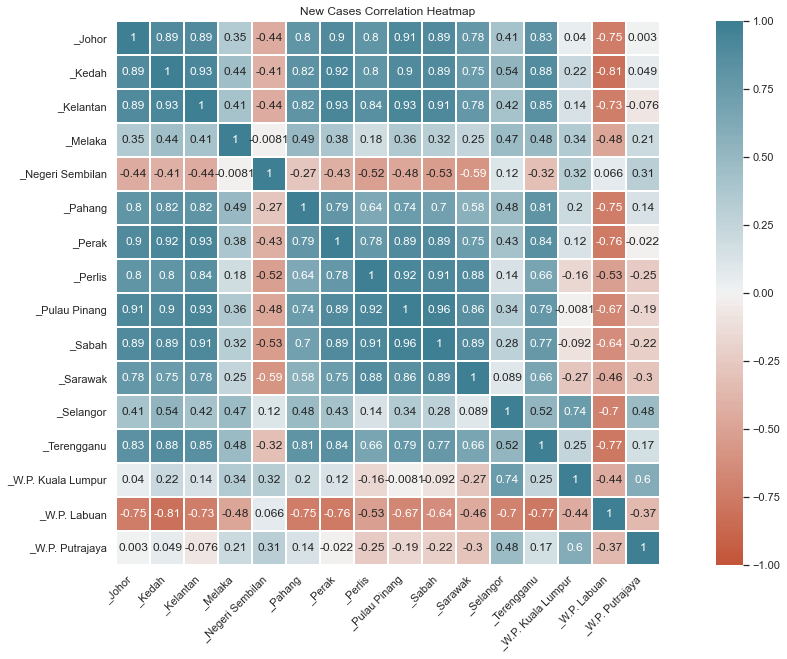

In [61]:
corr = state_case_new_df.corr()
fig, ax = plt.subplots(figsize=(20,10))  
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    linewidths = 2
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('New Cases Correlation Heatmap')

### Imported Cases

Text(0.5, 1.0, 'Imported Cases Correlation Heatmap')

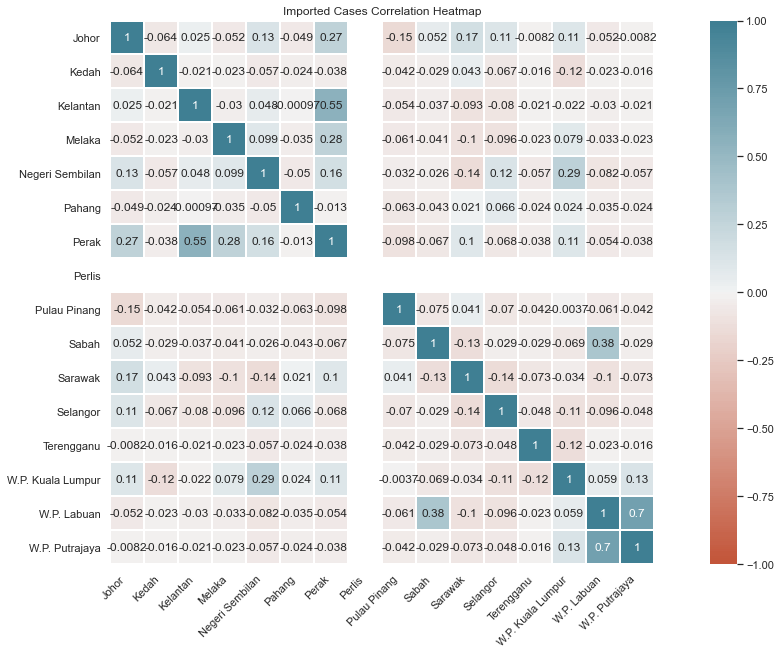

In [62]:
corr = state_case_import_df.corr()
fig, ax = plt.subplots(figsize=(20,10))  
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    linewidths = 2
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Imported Cases Correlation Heatmap')

### Recovered Cases

Text(0.5, 1.0, 'Recovered Cases Correlation Heatmap')

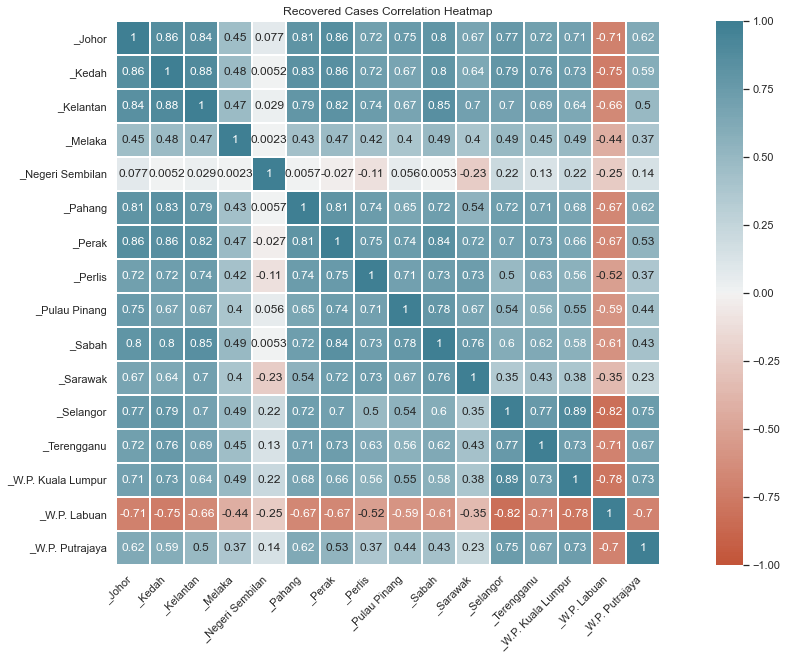

In [63]:
corr = state_case_recovered_df.corr()
fig, ax = plt.subplots(figsize=(20,10))  
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    linewidths = 2
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Recovered Cases Correlation Heatmap')

## Explanation on states that exhibit strong correlation with Pahang and Johor:

We have chosen the state cases dataset to find the underlying strong correlations that exist with Pahang and Johor. In order to do so, One-Hot encoding was applied to preprocess the dataset because states are categorical variables.  Generally, correlation coefficients are indicators of the strength of the linear relationship between two different variables, x and y, the _sign_ of correlation coefficients indicate a correlation is __positive__ or __negative__, and the _value_ of correlation coefficients that __larger than 0.6__ or __smaller than -0.6__ will be considered as strong.
In our case, we have checked the correlation between the states with Pahang and Johor for new cases, imported cases, and recovered cases.

##### New Cases
The state that exhibit strongest correlation in terms of New Covid Cases with __Pahang__: Kedah, correlation coefficient = 0.94
Other states are exhibiting strong correlations with Pahang as well with more than 0.6 correlation coefficient value  except Labuan with only 0.13 correlation coefficient value with Pahang

The state that exhibit strongest correlation in terms of New Covid Cases with __Johor__: Perak and Pulau Pinang, correlation coefficient = 0.93
Other states are exhibiting strong correlations with Pahang as well with more than 0.6 correlation coefficient value  except Negeri Sembilan and Labuan with only 0.5 and 0.094 correlation coefficient values with Pahang respectively. 
##### Imported Cases
The state that exhibit strongest correlation in terms of Imported Covid Cases with __Pahang__: Perak, correlation coefficient = 0.26
The state that exhibit strongest correlation in terms of Imported Covid Cases with __Johor__: Pulau Pinang, correlation coefficient = 0.17
Based on the result, it can be concluded that all states are not having strong correlation with each other. The reason might be that only particular states are more preferred by the foreigners for business or travel purposes. 
##### Recovered Cases
The state that exhibit strongest correlation in terms of Recovered Cases with __Pahang__: Kedah, correlation coefficient = 0.93
Other states are exhibiting strong correlations with Pahang as well with more than 0.6 correlation coefficient value  except Labuan with only 0.18 correlation coefficient value with Pahang

The state that exhibit strongest correlation in terms of Recovered Cases with ___Johor__: Perak, correlation coefficient = 0.83
Other states are exhibiting strong correlations with Pahang as well with more than 0.6 correlation coefficient value  except Negeri Sembilan and Labuan with only 0.56 and 0.13 correlation coefficient values with Pahang respectively. 


# <font color='FireBrick'>Question 3 (iii)</font>

Pre-processing the needed datasets : **Cluster, State Cases, Tests，Mysejahtera Checkins, PKRC, Hospital** </p> We use data of 4 states in Malaysia to perform feature selection : **Pahang, Johor, Kedah, Selangor**. </p>

In [64]:
state = ["Pahang","Kedah","Johor","Selangor"]

clusters_df = pd.read_csv(clusters_dir)
after_start_date = clusters_df["date_announced"] >= start_date
before_end_date = clusters_df["date_announced"] <= end_date
between_two_dates = after_start_date & before_end_date
clusters_df = clusters_df.loc[between_two_dates]
clusters_df = clusters_df.loc[clusters_df['state'].isin(state)]
clusters_df['date'] = clusters_df.date_announced

state_case_df = pd.read_csv(state_case_dir)
after_start_date = state_case_df["date"] >= start_date
before_end_date = state_case_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
state_case_df = state_case_df.loc[between_two_dates]
state_case_df = state_case_df.loc[state_case_df['state'].isin(state)]

states_tests_df = pd.read_csv(states_tests_dir)
after_start_date = states_tests_df["date"] >= start_date
before_end_date = states_tests_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
states_tests_df = states_tests_df.loc[between_two_dates]
states_tests_df = states_tests_df.loc[states_tests_df['state'].isin(state)]

mysejahtera = pd.read_csv(checkIn_dir)
after_start_date = mysejahtera["date"] >= start_date
before_end_date = mysejahtera["date"] <= end_date
between_two_dates = after_start_date & before_end_date
mysejahtera = mysejahtera.loc[between_two_dates]
mysejahtera = mysejahtera.loc[mysejahtera['state'].isin(state)]

pkrc_df = pd.read_csv(pkrc_dir)
after_start_date = pkrc_df["date"] >= start_date
before_end_date = pkrc_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
pkrc_df = pkrc_df.loc[between_two_dates]
pkrc_df = pkrc_df.loc[pkrc_df['state'].isin(state)]
pkrc_df['date'] = pkrc_df.date
pkrc_df = pkrc_df.add_suffix('_pkrc')

hospital_df = pd.read_csv(hospital_dir)
after_start_date = hospital_df["date"] >= start_date
before_end_date = hospital_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
hospital_df = hospital_df.loc[between_two_dates]
hospital_df = hospital_df.loc[hospital_df['state'].isin(state)]
hospital_df['date'] = hospital_df.date
hospital_df = hospital_df.add_suffix('_hospital')

In [65]:
# Cluster Dataset
## One-Hot Encoding
clusters_df = pd.get_dummies(clusters_df, prefix='cluster', columns=['category'])
## Drop unused columns
clusters_df.drop(['cases_new','cases_total','cases_active','tests','icu','deaths','recovered'], axis=1, inplace=True)
## Group by date and state
clusters_df=clusters_df.groupby(['date_announced','state']).sum()
clusters_df

cluster_community  cluster_detentionCentre  \
date_announced state                                                  
2021-07-01     Johor                     1                        0   
               Kedah                     1                        0   
               Selangor                  0                        0   
2021-07-02     Johor                     1                        0   
               Selangor                  0                        0   
...                                    ...                      ...   
2021-08-30     Selangor                  1                        0   
2021-08-31     Johor                     1                        0   
               Kedah                     0                        0   
               Pahang                    1                        0   
               Selangor                  0                        1   

                         cluster_education  cluster_highRisk  cluster_import  \
date_announced state                                                           
2021-07-01     Johor                     0                 0               0   
               Kedah                     0                 0               0   
               Selangor                  0                 0               0   
2021-07-02     Johor                     0                 1               0   
               Selangor                  0                 1               0   
...                                    ...               ...             ...   
2021-08-30     Selangor                  0                 0               0   
2021-08-31     Johor                     0                 0               0   
               Kedah                     0                 1               0   
               Pahang                    0                 0               0   
               Selangor                  0                 1               0   

                         cluster_religious  cluster_workplace  
date_announced state                                           
2021-07-01     Johor                     0                  1  
               Kedah                     0                  2  
               Selangor                  0                  2  
2021-07-02     Johor                     0                  3  
               Selangor                  0                  2  
...                                    ...                ...  
2021-08-30     Selangor                  0                  1  
2021-08-31     Johor                     0                  4  
               Kedah                     0                  0  
               Pahang                    0                  2  
               Selangor                  0                  2  

[207 rows x 7 columns]

In [66]:
# State Cases Dataset
## Group by date and state
state_case_df=state_case_df.groupby(['date','state']).sum()
state_case_df

cases_import  cases_new  cases_recovered
date       state                                             
2021-07-01 Johor                1        270              361
           Kedah                0        250              186
           Pahang               0        195               19
           Selangor             2       2885             1829
2021-07-02 Johor                0        517              584
...                           ...        ...              ...
2021-08-30 Selangor             0       3567             5720
2021-08-31 Johor                0       2159             1239
           Kedah                0       1942             1870
           Pahang               0        798              545
           Selangor             1       4371             3729

[248 rows x 3 columns]

In [67]:
# State Tests Dataset
## Group by date and state
states_tests_df=states_tests_df.groupby(['date','state']).sum()
states_tests_df

rtk-ag    pcr
date       state                  
2021-07-01 Johor       2749   3670
           Kedah       2073   1297
           Pahang      2103   2605
           Selangor   13805  16460
2021-07-02 Johor       2455   4428
...                     ...    ...
2021-08-30 Selangor   24784  11085
2021-08-31 Johor       8119  10228
           Kedah       2535   3642
           Pahang      1267   3105
           Selangor   16278  14598

[248 rows x 2 columns]

In [68]:
# MySejahtera Checkins Dataset
## One-Hot Encoding
mysejahtera = pd.get_dummies(mysejahtera, prefix='', columns=['state'])
mysejahtera_checkins = mysejahtera.loc[:,'_Johor':].multiply(mysejahtera["checkins"], axis="index")
mysejahtera_checkins.columns = mysejahtera_checkins.columns.str[1:]
mysejahtera_checkins["date"] = mysejahtera.date
## Group by date and state
mysejahtera_checkins = mysejahtera_checkins.groupby([mysejahtera_checkins['date']]).sum()
mysejahtera_checkins.columns.name = 'state'
mysejahtera_checkins = mysejahtera_checkins.stack()
mysejahtera_checkins.name = 'Checkins number'
mysejahtera_checkins = mysejahtera_checkins.reset_index()
mysejahtera_checkins = mysejahtera_checkins.groupby(['date','state']).sum()
mysejahtera_checkins

Checkins number
date       state                    
2021-07-01 Johor             2093025
           Kedah              764979
           Pahang             721212
           Selangor          4308720
2021-07-02 Johor             2053330
...                              ...
2021-08-30 Selangor          5211401
2021-08-31 Johor             1754546
           Kedah              612695
           Pahang             616722
           Selangor          4467788

[248 rows x 1 columns]

In [69]:
# PKRC Dataset
## Group by date and state
pkrc_df = pkrc_df.groupby(['date_pkrc','state_pkrc']).sum()
pkrc_df

beds_pkrc  admitted_pui_pkrc  admitted_covid_pkrc  \
date_pkrc  state_pkrc                                                      
2021-07-01 Johor            2321                  0                  103   
           Kedah             540                  0                   71   
           Pahang           2908                 10                  206   
           Selangor         5668                  3                 1157   
2021-07-02 Johor            2292                  0                  115   
...                          ...                ...                  ...   
2021-08-30 Selangor         4446                  0                  379   
2021-08-31 Johor            2385                  0                  384   
           Kedah             826                  0                   62   
           Pahang           4265                  7                  383   
           Selangor         4124                  2                  364   

                       admitted_total_pkrc  discharge_pui_pkrc  \
date_pkrc  state_pkrc                                            
2021-07-01 Johor                       103                   0   
           Kedah                        71                   0   
           Pahang                      216                   1   
           Selangor                   1160                   1   
2021-07-02 Johor                       115                   0   
...                                    ...                 ...   
2021-08-30 Selangor                    379                   1   
2021-08-31 Johor                       384                   1   
           Kedah                        62                   0   
           Pahang                      390                   5   
           Selangor                    366                   0   

                       discharge_covid_pkrc  discharge_total_pkrc  \
date_pkrc  state_pkrc                                               
2021-07-01 Johor                        152                   152   
           Kedah                         55                    55   
           Pahang                        71                    72   
           Selangor                     853                   854   
2021-07-02 Johor                         89                    89   
...                                     ...                   ...   
2021-08-30 Selangor                     423                   424   
2021-08-31 Johor                        306                   307   
           Kedah                         60                    60   
           Pahang                       289                   294   
           Selangor                     447                   447   

                       pkrc_covid_pkrc  pkrc_pui_pkrc  pkrc_noncovid_pkrc  
date_pkrc  state_pkrc                                                      
2021-07-01 Johor                   964              0                   0  
           Kedah                   348              0                   0  
           Pahang                 1126             33                   0  
           Selangor               5476             10                  40  
2021-07-02 Johor                   984              0                   0  
...                                ...            ...                 ...  
2021-08-30 Selangor               2949             10                   0  
2021-08-31 Johor                  2021              2                   2  
           Kedah                   395              0                   0  
           Pahang                 2683            438                   0  
           Selangor               2897              0                   0  

[248 rows x 10 columns]

In [70]:
# Hospital Dataset
## Group by date and state
hospital_df = hospital_df.groupby(['date_hospital','state_hospital']).sum()
hospital_df

beds_hospital  beds_covid_hospital  \
date_hospital state_hospital                                       
2021-07-01    Johor                    5090                 1535   
              Kedah                    2755                  661   
              Pahang                   2250                  842   
              Selangor                 6568                 2499   
2021-07-02    Johor                    5160                 1545   
...                                     ...                  ...   
2021-08-30    Selangor                 6302                 4543   
2021-08-31    Johor                    5160                 2453   
              Kedah                    2664                 1165   
              Pahang                   2145                  734   
              Selangor                 6302                 4247   

                              beds_noncrit_hospital  admitted_pui_hospital  \
date_hospital state_hospital                                                 
2021-07-01    Johor                            4903                    178   
              Kedah                            2639                      1   
              Pahang                           2175                      9   
              Selangor                         6164                    126   
2021-07-02    Johor                            4973                    117   
...                                             ...                    ...   
2021-08-30    Selangor                         5866                     85   
2021-08-31    Johor                            5000                    156   
              Kedah                            2517                     10   
              Pahang                           2053                      8   
              Selangor                         5866                    105   

                              admitted_covid_hospital  \
date_hospital state_hospital                            
2021-07-01    Johor                               131   
              Kedah                                70   
              Pahang                               66   
              Selangor                            335   
2021-07-02    Johor                               112   
...                                               ...   
2021-08-30    Selangor                            293   
2021-08-31    Johor                               358   
              Kedah                               158   
              Pahang                               63   
              Selangor                            285   

                              admitted_total_hospital  \
date_hospital state_hospital                            
2021-07-01    Johor                               309   
              Kedah                                71   
              Pahang                               75   
              Selangor                            461   
2021-07-02    Johor                               229   
...                                               ...   
2021-08-30    Selangor                            378   
2021-08-31    Johor                               514   
              Kedah                               168   
              Pahang                               71   
              Selangor                            390   

                              discharged_pui_hospital  \
date_hospital state_hospital                            
2021-07-01    Johor                               130   
              Kedah                                 0   
              Pahang                               13   
              Selangor                             92   
2021-07-02    Johor                               101   
...                                               ...   
2021-08-30    Selangor                             55   
2021-08-31    Johor                                79   
              Kedah                                 3   
              Pahan

## Merge Datasets

In [71]:
df_final = pd.concat([clusters_df, states_tests_df, state_case_df,mysejahtera_checkins,pkrc_df,hospital_df], axis=1)
df_final.fillna(0,inplace=True)
df_final

cluster_community  cluster_detentionCentre  \
2021-07-01 Johor                   1.0                      0.0   
           Kedah                   1.0                      0.0   
           Pahang                  0.0                      0.0   
           Selangor                0.0                      0.0   
2021-07-02 Johor                   1.0                      0.0   
...                                ...                      ...   
2021-08-30 Selangor                1.0                      0.0   
2021-08-31 Johor                   1.0                      0.0   
           Kedah                   0.0                      0.0   
           Pahang                  1.0                      0.0   
           Selangor                0.0                      1.0   

                     cluster_education  cluster_highRisk  cluster_import  \
2021-07-01 Johor                   0.0               0.0             0.0   
           Kedah                   0.0               0.0             0.0   
           Pahang                  0.0               0.0             0.0   
           Selangor                0.0               0.0             0.0   
2021-07-02 Johor                   0.0               1.0             0.0   
...                                ...               ...             ...   
2021-08-30 Selangor                0.0               0.0             0.0   
2021-08-31 Johor                   0.0               0.0             0.0   
           Kedah                   0.0               1.0             0.0   
           Pahang                  0.0               0.0             0.0   
           Selangor                0.0               1.0             0.0   

                     cluster_religious  cluster_workplace  rtk-ag    pcr  \
2021-07-01 Johor                   0.0                1.0    2749   3670   
           Kedah                   0.0                2.0    2073   1297   
           Pahang                  0.0                0.0    2103   2605   
           Selangor                0.0                2.0   13805  16460   
2021-07-02 Johor                   0.0                3.0    2455   4428   
...                                ...                ...     ...    ...   
2021-08-30 Selangor                0.0                1.0   24784  11085   
2021-08-31 Johor                   0.0                4.0    8119  10228   
           Kedah                   0.0                0.0    2535   3642   
           Pahang                  0.0                2.0    1267   3105   
           Selangor                0.0                2.0   16278  14598   

                     cases_import  ...  beds_noncrit_hospital  \
2021-07-01 Johor                1  ...                   4903   
           Kedah                0  ...                   2639   
           Pahang               0  ...                   2175   
           Selangor             2  ...                   6164   
2021-07-02 Johor                0  ...                   4973   
...                           ...  ...                    ...   
2021-08-30 Selangor             0  ...                   5866   
2021-08-31 Johor                0  ...                   5000   
           Kedah                0  ...                   2517   
           Pahang               0  ...                   2053   
           Selangor             1  ...                   5866   

                     admitted_pui_hospital  admitted_covid_hospital  \
2021-07-01 Johor                       178                      131   
           Kedah                         1                       70   
           Pahang                        9                       66   
           Selangor                    126                      335   
2021-07-02 Johor                       117                      112   
...                                    ...                      ...   
2021-08-30 Selangor                     85                      293   
2021-08-31 Johor                       15

## Perform Boruta Classifier

In [72]:
df_final = pd.read_csv("./dataset/cleaned_data.csv")
df_final.rename(columns = {'Unnamed: 0': 'date', 'Unnamed: 1': 'state'}, inplace=True)
rslt_df_ph = df_final[df_final['state'] == "Pahang"]
rslt_df_kd = df_final[df_final['state'] == "Kedah"]
rslt_df_jh = df_final[df_final['state'] == "Johor"]
rslt_df_sl = df_final[df_final['state'] == "Selangor"]

### Random forest classifier

In [73]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced",criterion = "entropy")
rf

RandomForestClassifier(class_weight='balanced', criterion='entropy', n_jobs=-1)

### Boruta Model

In [74]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [75]:
feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)

---------Top 5----------


,Features,Score
31,hosp_covid_hospital,1.00
8,pcr,1.00
10,cases_recovered,1.00
7,rtk-ag,0.97
11,Checkins number,0.97


Text(0.5, 1.0, 'Boruta Top Features for All 4 states')

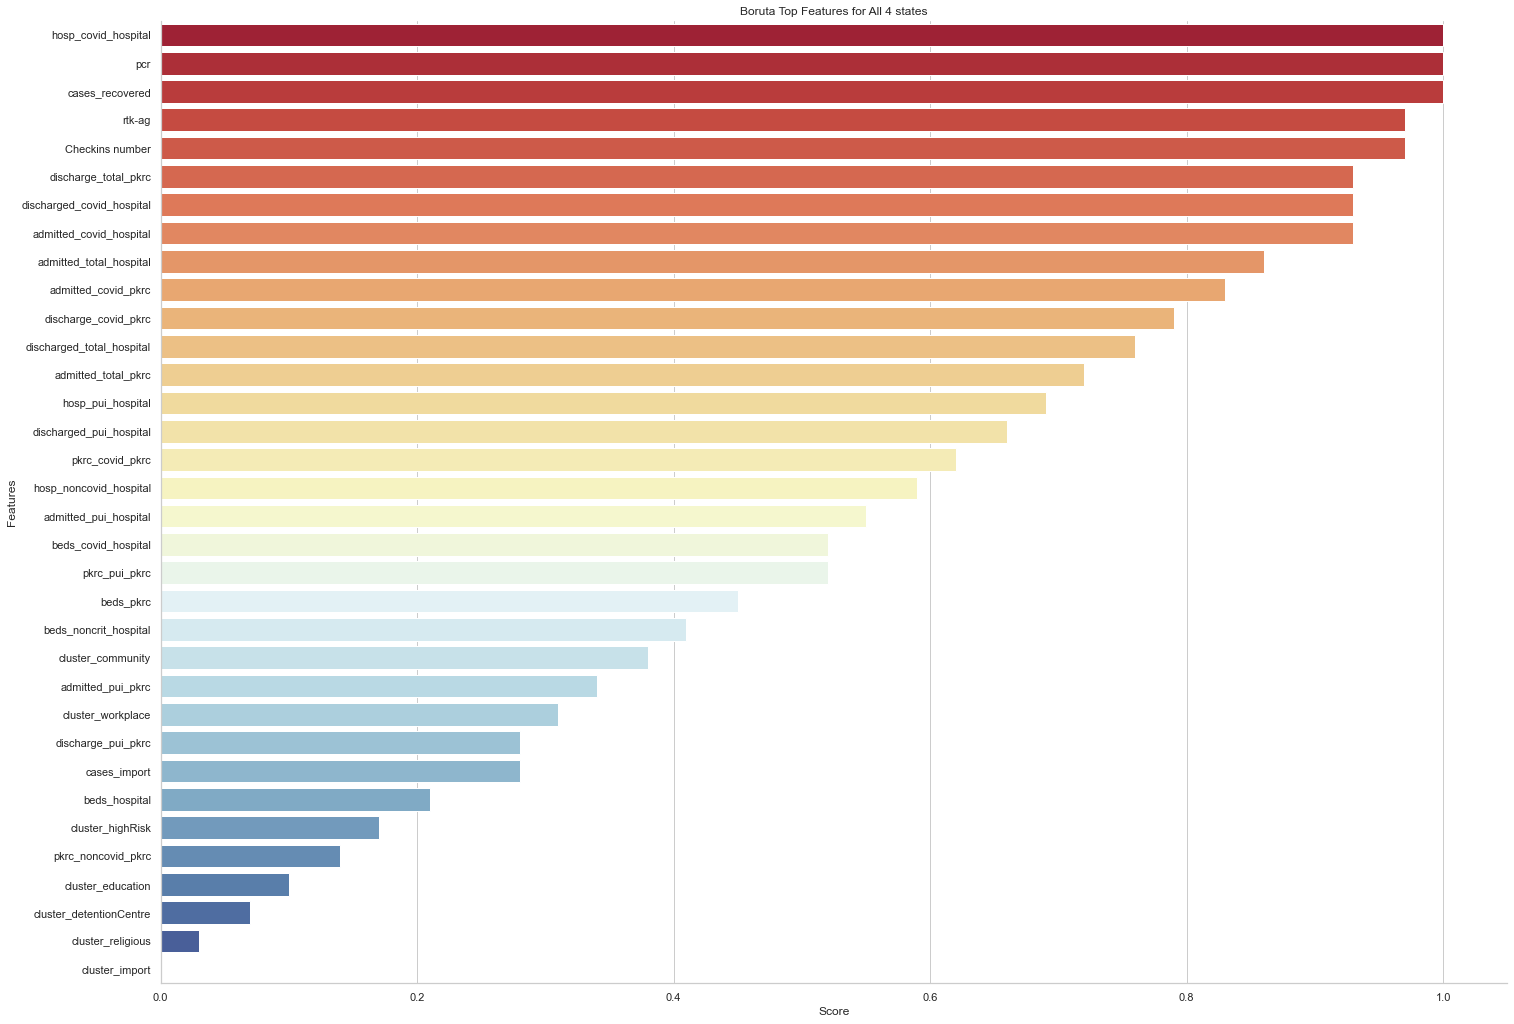

In [76]:
# four states
df = df_final
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
colnames = X.columns
feat_selector.fit(X.values, y.values.ravel())
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score']) 
boruta_score = boruta_score.sort_values("Score",ascending = False)
print('---------Top 5----------')
display(boruta_score.head(5))
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:35], kind = "bar", height=14, aspect=1.5, palette='RdYlBu')
plt.title("Boruta Top Features for All 4 states")

---------Top 5----------


,Features,Score
7,rtk-ag,1.00
11,Checkins number,0.97
17,discharge_covid_pkrc,0.94
33,hosp_noncovid_hospital,0.91
8,pcr,0.88


Text(0.5, 1.0, 'Boruta Top Features for Pahang')

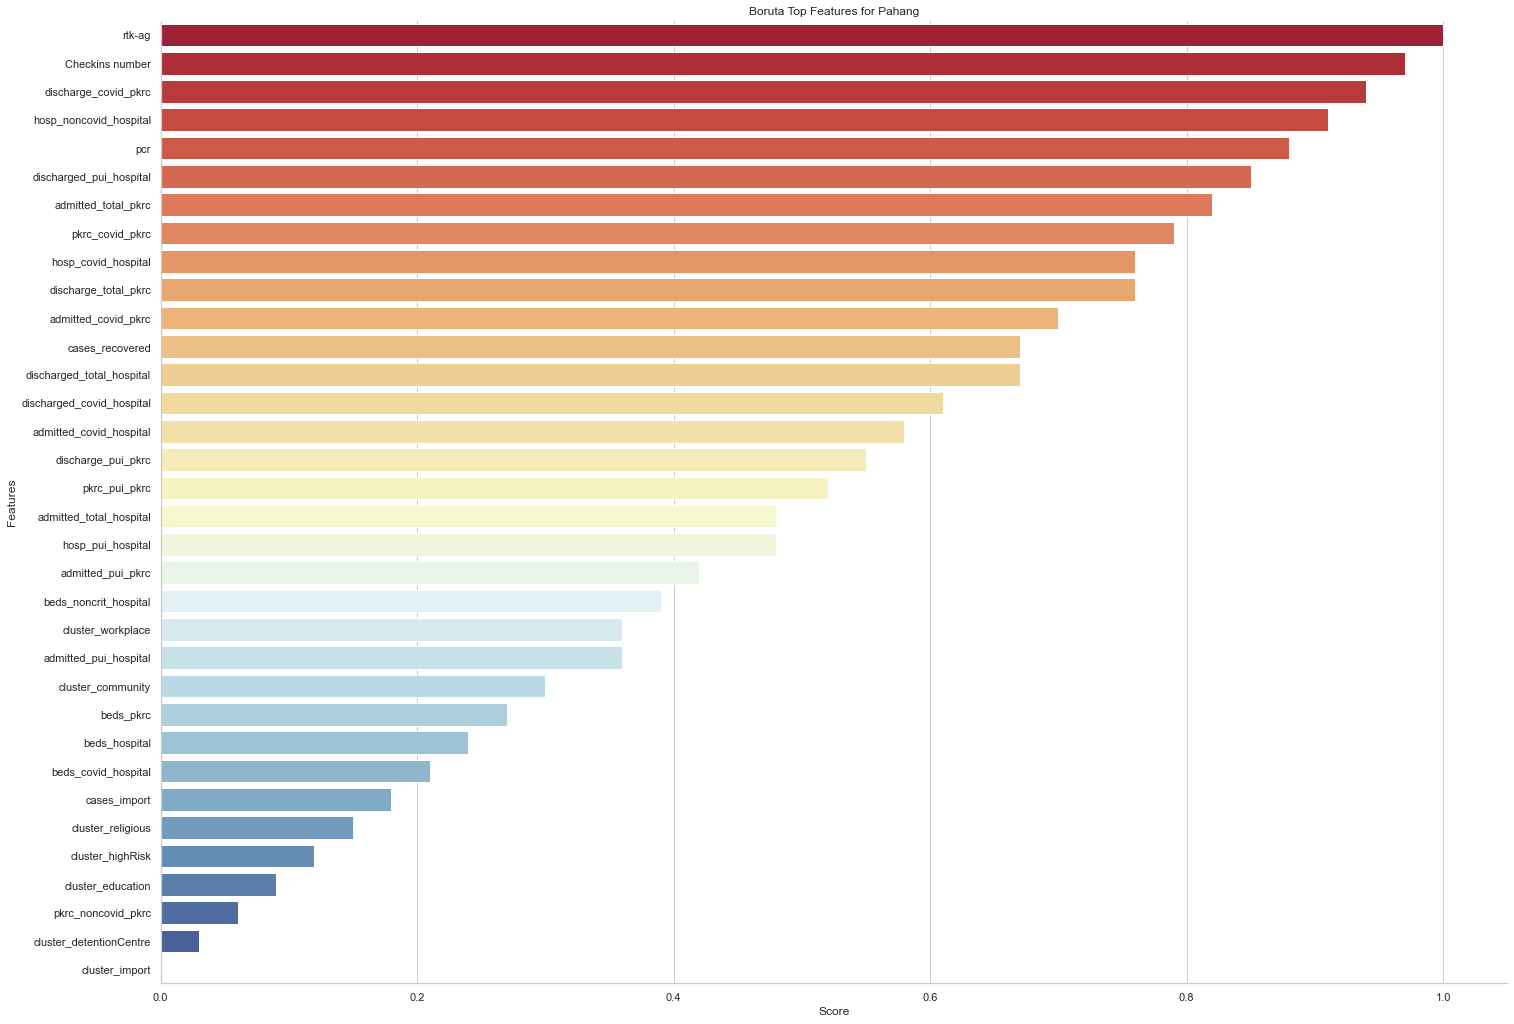

In [77]:
# Pahang
df = rslt_df_ph
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
colnames = X.columns
feat_selector.fit(X.values, y.values.ravel())
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score']) 
boruta_score = boruta_score.sort_values("Score",ascending = False)
print('---------Top 5----------')
display(boruta_score.head(5))
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:35], kind = "bar", height=14, aspect=1.5, palette='RdYlBu')
plt.title("Boruta Top Features for Pahang")

---------Top 5----------


,Features,Score
33,hosp_noncovid_hospital,1.00
31,hosp_covid_hospital,1.00
10,cases_recovered,1.00
7,rtk-ag,0.94
19,pkrc_covid_pkrc,0.94


Text(0.5, 1.0, 'Boruta Top Features for Kedah')

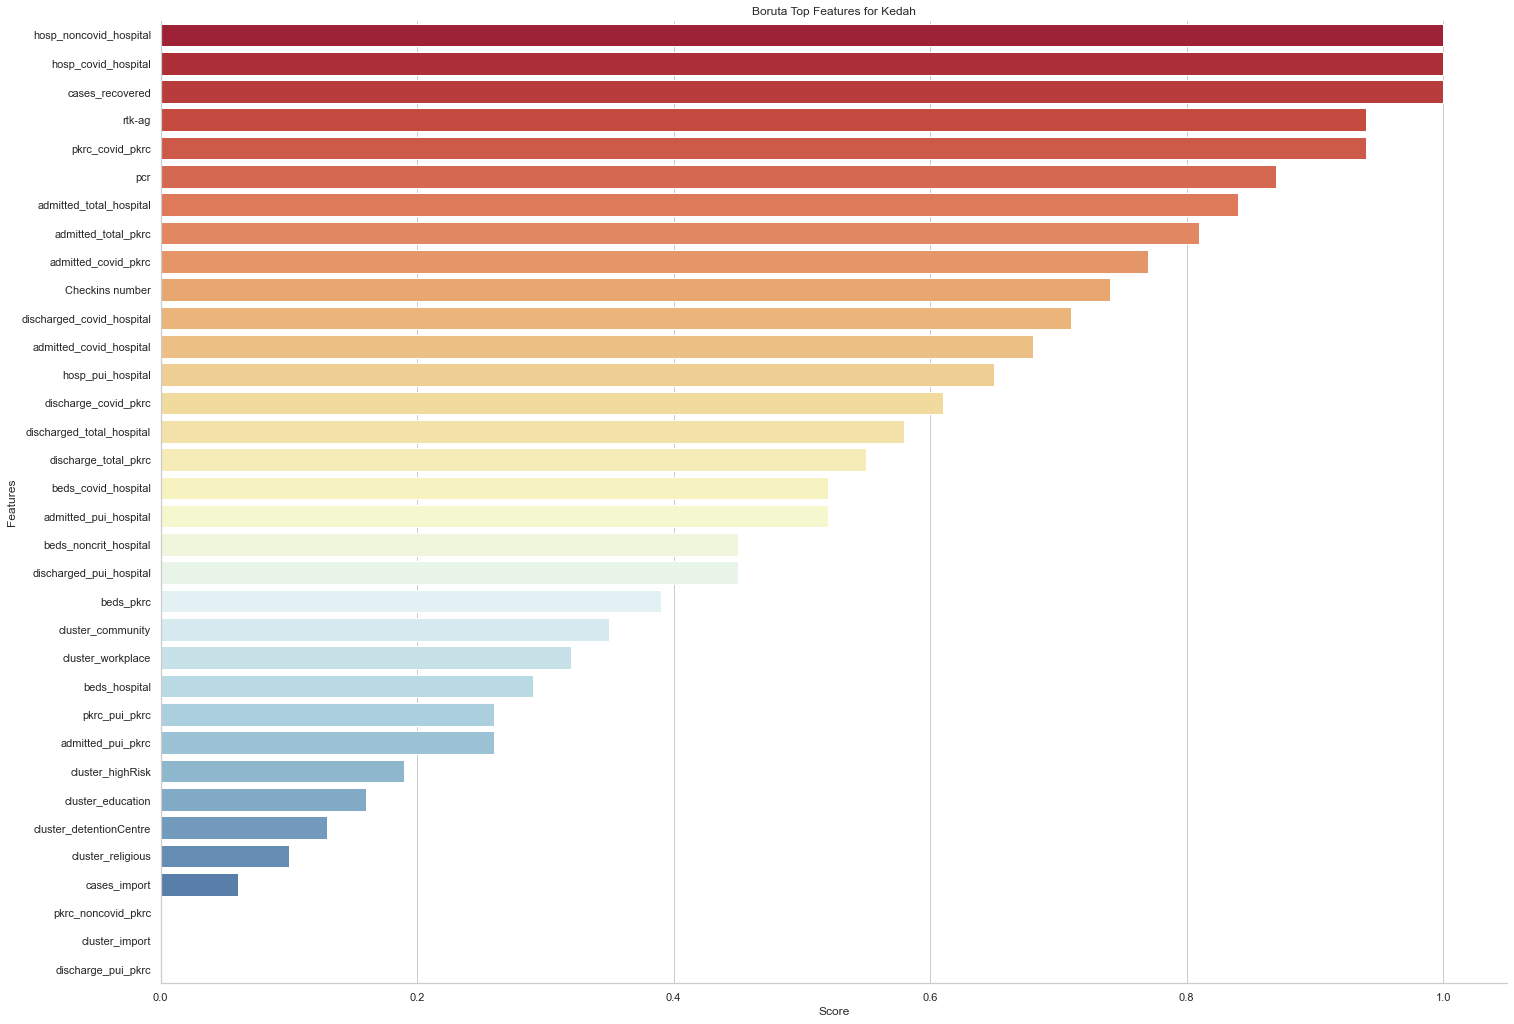

In [78]:
# Kedah
df =rslt_df_kd
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
colnames = X.columns
feat_selector.fit(X.values, y.values.ravel())
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score']) 
boruta_score = boruta_score.sort_values("Score",ascending = False)
print('---------Top 5----------')
display(boruta_score.head(5))
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:35], kind = "bar", height=14, aspect=1.5, palette='RdYlBu')
plt.title("Boruta Top Features for Kedah")

---------Top 5----------


,Features,Score
7,rtk-ag,1.00
18,discharge_total_pkrc,1.00
10,cases_recovered,1.00
17,discharge_covid_pkrc,0.94
8,pcr,0.91


Text(0.5, 1.0, 'Boruta Top Features for Johor')

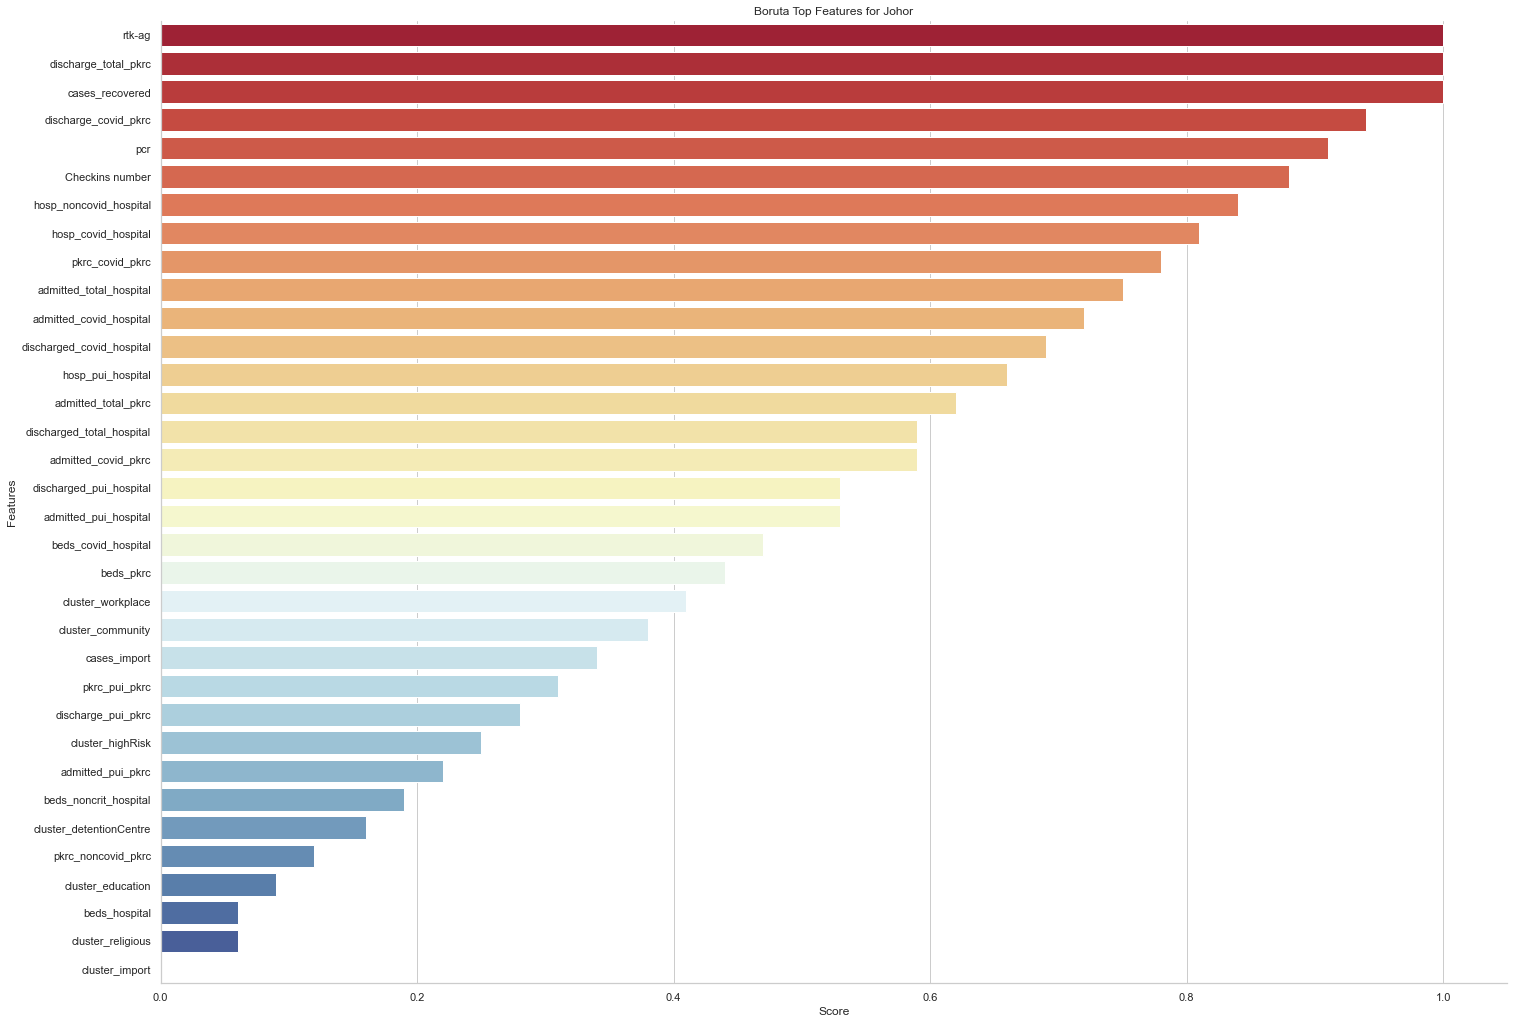

In [79]:
# Johor
df = rslt_df_jh
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
colnames = X.columns
feat_selector.fit(X.values, y.values.ravel())
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score']) 
boruta_score = boruta_score.sort_values("Score",ascending = False)
print('---------Top 5----------')
display(boruta_score.head(5))
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:35], kind = "bar", height=14, aspect=1.5, palette='RdYlBu')
plt.title("Boruta Top Features for Johor")

---------Top 5----------


,Features,Score
14,admitted_covid_pkrc,1.00
10,cases_recovered,0.97
17,discharge_covid_pkrc,0.94
33,hosp_noncovid_hospital,0.91
15,admitted_total_pkrc,0.88


Text(0.5, 1.0, 'Boruta Top Features for Selangor')

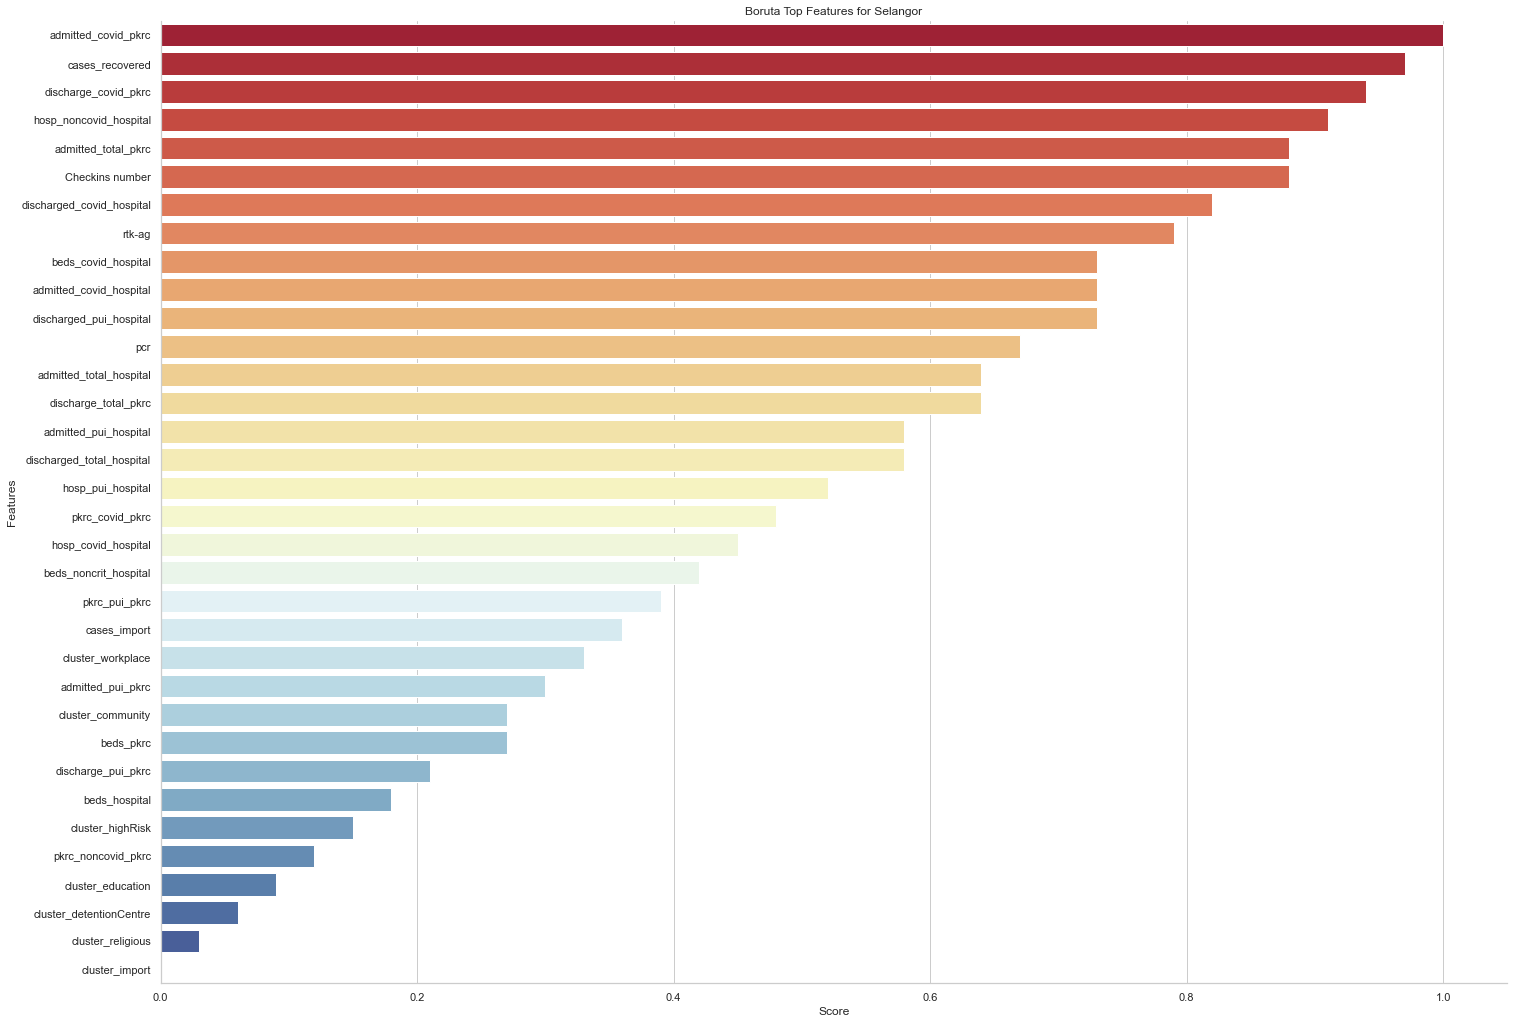

In [80]:
# Selangor
df = rslt_df_sl
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
colnames = X.columns
feat_selector.fit(X.values, y.values.ravel())
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score']) 
boruta_score = boruta_score.sort_values("Score",ascending = False)
print('---------Top 5----------')
display(boruta_score.head(5))
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:35], kind = "bar", 
               height=14, aspect=1.5, palette='RdYlBu')
plt.title("Boruta Top Features for Selangor")

## Perform RFE Classifier

---------Top 5----------


,Features,Score
17,discharge_covid_pkrc,1.0
11,Checkins number,1.0
32,hosp_pui_hospital,1.0
31,hosp_covid_hospital,1.0
30,discharged_total_hospital,1.0


Text(0.5, 1.0, 'RFE Features Ranking')

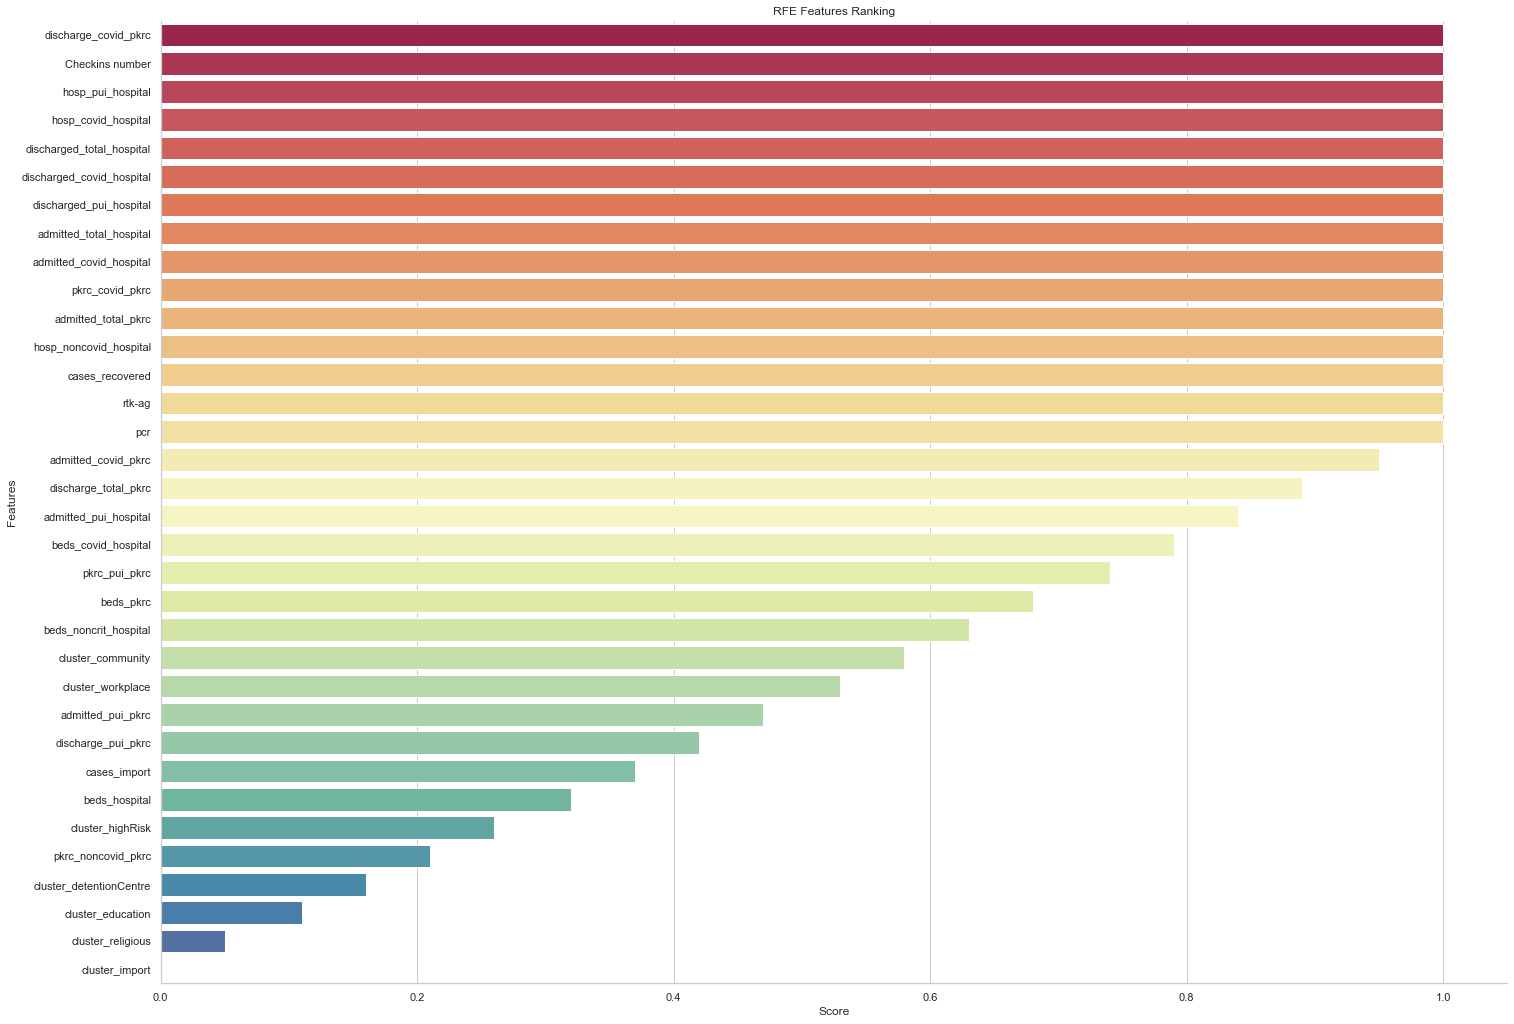

In [81]:
# 4 states
df = df_final
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced",criterion = "entropy")
rfe = RFECV(rf, min_features_to_select = 1, cv =2)
rfe.fit(X, y)
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:35], kind = "bar", 
               height=14, aspect=1.5, palette='Spectral')
plt.title("RFE Features Ranking")

---------Top 5----------


,Features,Score
33,hosp_noncovid_hospital,1.00
11,Checkins number,1.00
7,rtk-ag,1.00
14,admitted_covid_pkrc,0.97
18,discharge_total_pkrc,0.94


Text(0.5, 1.0, 'RFE Features Ranking for Pahang')

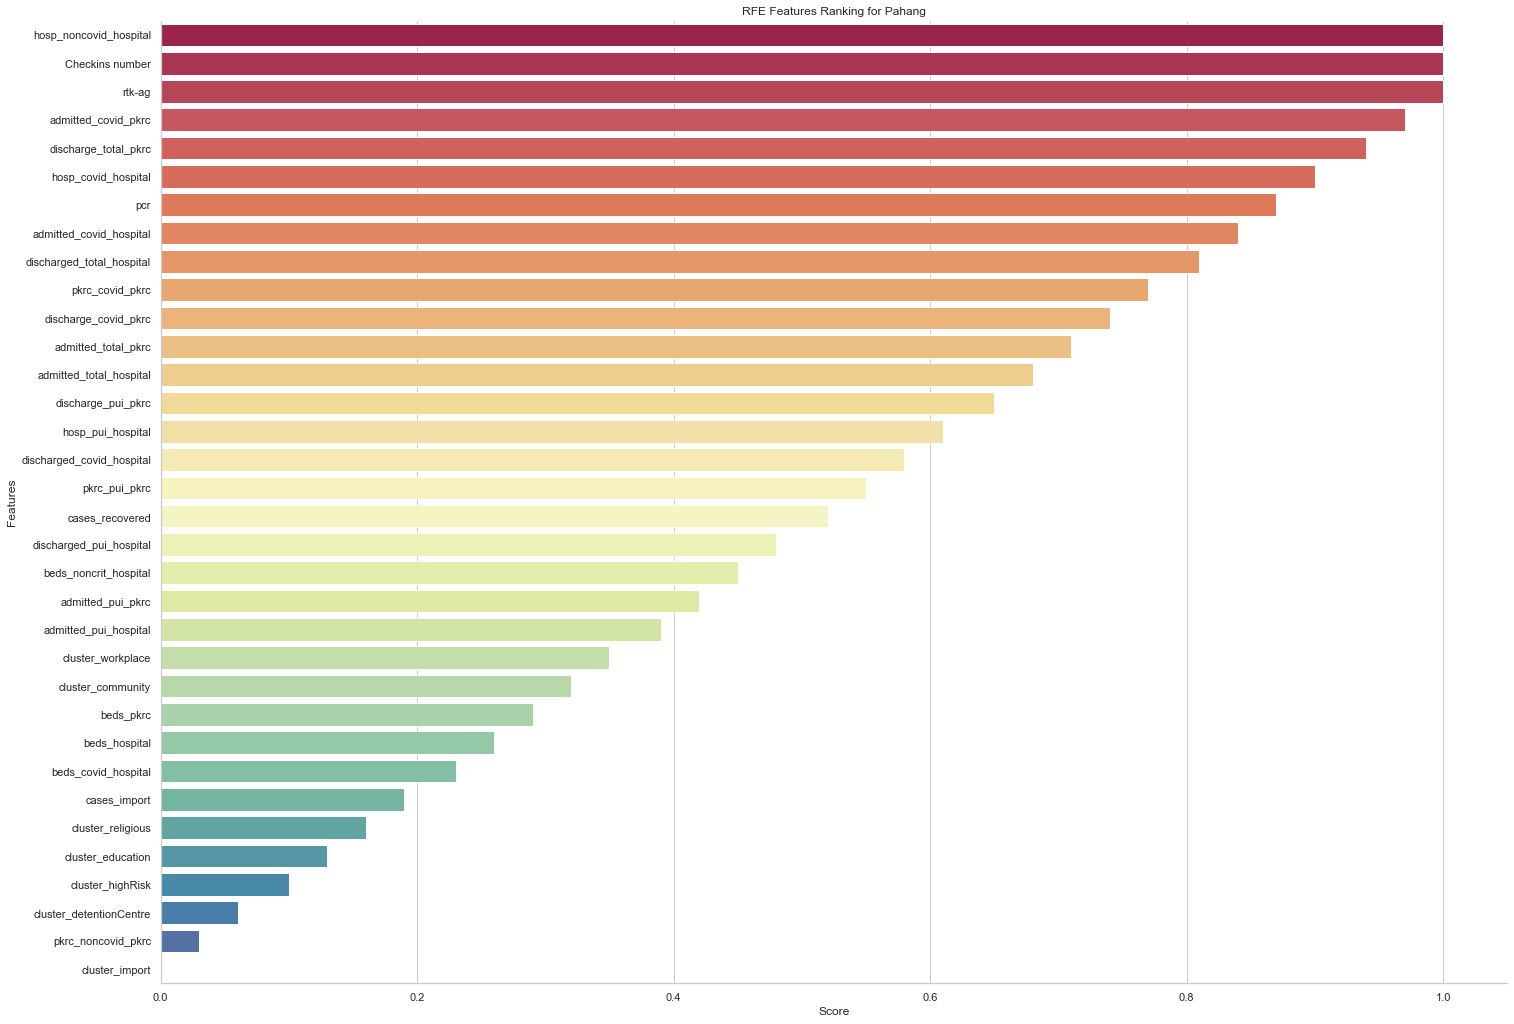

In [82]:
# Pahang
df = rslt_df_ph
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced",criterion = "entropy")
rfe = RFECV(rf, min_features_to_select = 1, cv =2)
rfe.fit(X, y)
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:35], kind = "bar", 
               height=14, aspect=1.5, palette='Spectral')
plt.title("RFE Features Ranking for Pahang")

---------Top 5----------


,Features,Score
33,hosp_noncovid_hospital,1.00
31,hosp_covid_hospital,1.00
7,rtk-ag,1.00
10,cases_recovered,1.00
8,pcr,0.97


Text(0.5, 1.0, 'RFE Features Ranking for Kedah')

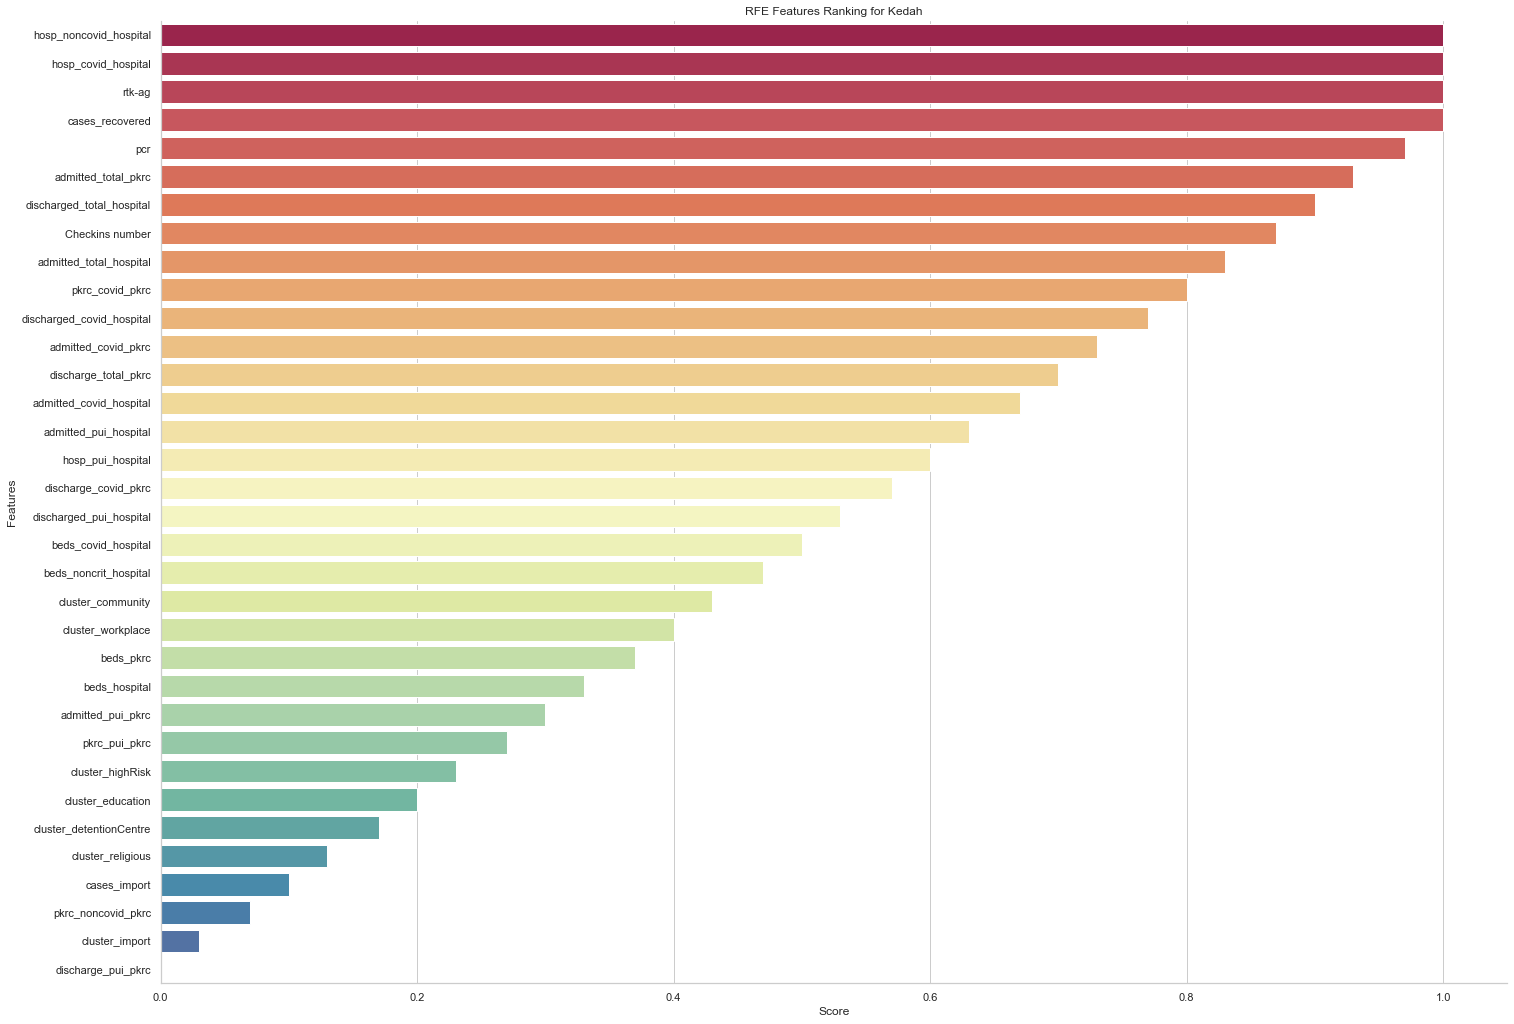

In [83]:
# Kedah
df = rslt_df_kd
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced",criterion = "entropy")
rfe = RFECV(rf, min_features_to_select = 1, cv =2)
rfe.fit(X, y)
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:35], kind = "bar", 
               height=14, aspect=1.5, palette='Spectral')
plt.title("RFE Features Ranking for Kedah")

---------Top 5----------


,Features,Score
15,admitted_total_pkrc,1.00
26,admitted_covid_hospital,1.00
19,pkrc_covid_pkrc,1.00
11,Checkins number,1.00
18,discharge_total_pkrc,0.97


Text(0.5, 1.0, 'RFE Features Ranking for Johor')

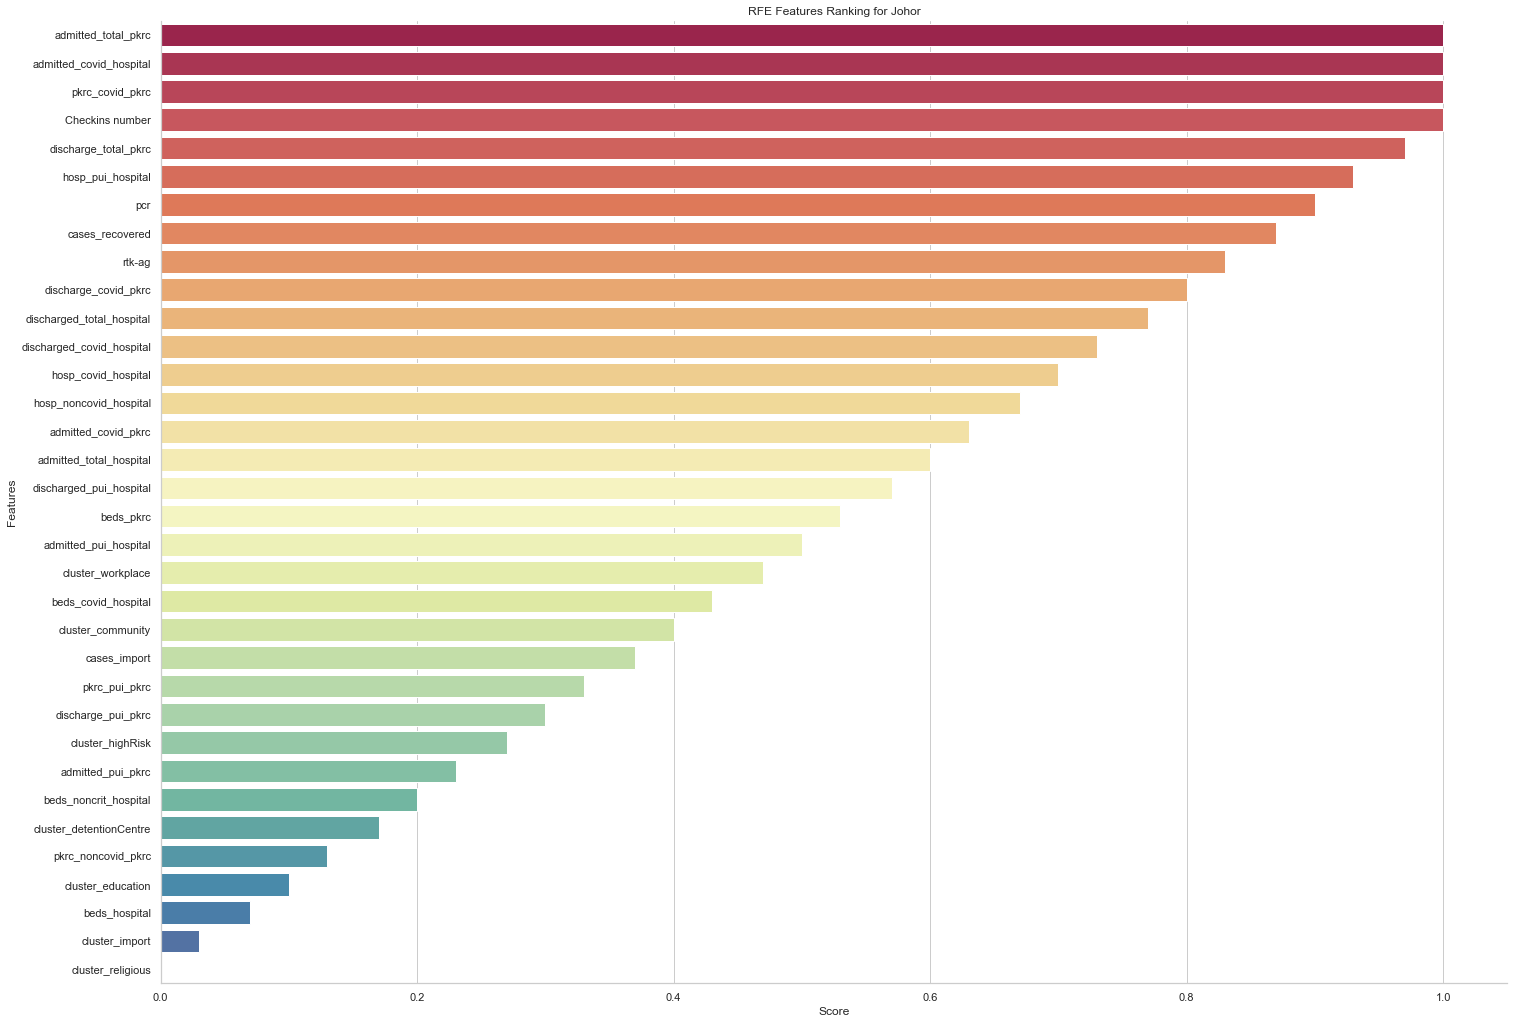

In [84]:
# Johor
df = rslt_df_jh
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced",criterion = "entropy")
rfe = RFECV(rf, min_features_to_select = 1, cv =2)
rfe.fit(X, y)
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:35], kind = "bar", 
               height=14, aspect=1.5, palette='Spectral')
plt.title("RFE Features Ranking for Johor")

---------Top 5----------


,Features,Score
7,rtk-ag,1.00
8,pcr,1.00
10,cases_recovered,1.00
22,beds_hospital,0.97
24,beds_noncrit_hospital,0.94


Text(0.5, 1.0, 'RFE Features Ranking for Selangor')

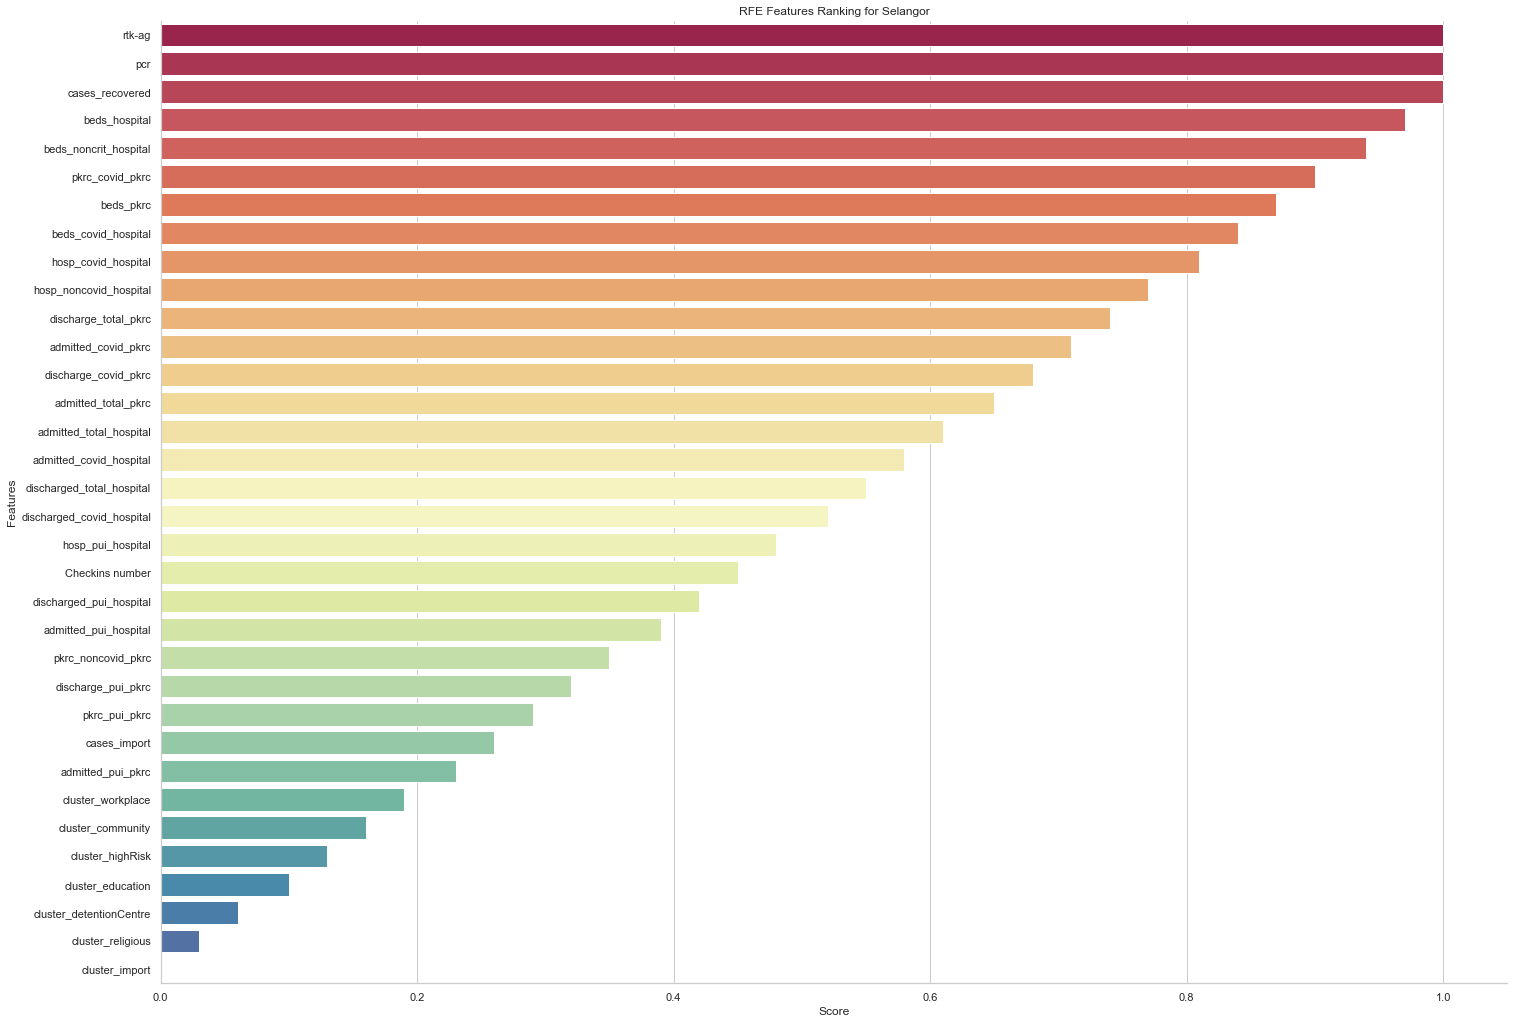

In [85]:
# Selangor
df = rslt_df_sl
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
rfe.fit(X, y)
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:35], kind = "bar", 
               height=14, aspect=1.5, palette='Spectral')
plt.title("RFE Features Ranking for Selangor")

## Explanation on the strong features/indicators to daily cases for Pahang, Kedah, Johor, and Selangor:

__Objective__   
The goal of question iii (  feature selection ) is to eliminate irrelevant and/or redundant features while keeping only those that are relevant. It is possible to remove non-essential features without affecting learning performance. Reduce the training time for machine learning.
 
__Methods__    
Two Feature Selection Methods are used, which are: Boruta and Recursive Feature Elimination (RFE)

- Boruta   
It will first shuffle the values of predictors and join them with the original predictors. It will create a random forest on the merged dataset then compare the original variables to the randomized variables to determine the importance of variables. Only variables with greater significance than the randomised variables are considered significant.
 
- Recursive Feature Elimination (RFE)   
Recursive Feature Elimination (RFE) works by searching for a subset of features in the training dataset, starting with all of them and successfully removing them until the desired number remains. This is accomplished by re-fitting the model using the given machine learning algorithm, ranking features by importance, discarding the least important features, and fitting the model again. This procedure is repeated until only a certain number of features are left.
 
We firstly merged the datasets based on states and dates, and passed the columns of the merged as features to the aforementioned two feature selection methods to acquire the ranking and then choose the more significant features to predict for the recent future new covid case. 

Johor  
| Ranking | Features ( Boruta )    | Features ( RFE )        |
|---------|------------------------|-------------------------|
| 1       | rtk-ag                 | admitted_covid_hospital |
| 2       | Checkins Number        | rtk-ag                  |
| 3       | pkrc_covid_pkrc        | pcr                     |
| 4       | discharge_covid_pkrc   | cases_recovered         |
| 5       | hosp_noncovid_hospital | Checkins_Number         |
		
Kedah  
| Ranking | Features ( Boruta )    | Features ( RFE )       |
|---------|------------------------|------------------------|
| 1       | hosp_covid_hospital    | cases_recovered        |
| 2       | cases_recovered        | hosp_noncovid_hospital |
| 3       | hosp_noncovid_hospital | hosp_covid_hospital    |
| 4       | rtk-ag                 | rtk-ag                 |
| 5       | pkrc_covid_pkrc        | pkrc_covid_pkrc        |
	
Pahang  
| Ranking | Features ( Boruta )    | Features ( RFE )     |
|---------|------------------------|----------------------|
| 1       | Checkins number        | Checkins number      |
| 2       | rtk-ag                 | pcr                  |
| 3       | pcr                    | rtk-ag               |
| 4       | discharge_covid_pkrc   | discharge_total_pkrc |
| 5       | hosp_noncovid_hospital | admitted_total_pkrc  |
	
Selangor  
| Ranking | Features ( Boruta )        | Features ( RFE )      |
|---------|----------------------------|-----------------------|
| 1       | cases_recovered            | rtk-ag                |
| 2       | discharged_total_hospitall | pcr                   |
| 3       | admitted_covid_hospital    | cases_recovered       |
| 4       | pkrc_covid_pkrc            | beds_hospital         |
| 5       | rtk-ag                     | beds_noncrit_hospital |  
	
All States
| Ranking | Features ( Boruta ) | Features ( RFE )    |
|---------|---------------------|---------------------|
| 1       | hosp_covid_hospital | hosp_covid_hospital |
| 2       | cases_recovered     | rtk-ag              |
| 3       | pcr                 | cases_recovered     |
| 4       | Checkins Number     | Checkins Number     |
| 5       | rtk-ag              | pcr                 |

The features differ for different states and merged dataset. In the result, rtk-ag has been in top 5 features suggested by both Boruta and RFE methods, the reason might be because more people testing will result in more cases being reported.


# <font color='FireBrick'>Question 3 (iv)</font>

## Regression 

In [86]:
def printResult(y_test,y_pred):
    print("Median absolute error : " + str(median_absolute_error(y_test, y_pred)))
    print("Mean absolute error : " + str(mean_absolute_error(y_test, y_pred)))
    print("Mean squared error : " + str(mean_squared_error(y_test, y_pred)))
    print("Root mean square error : " + str(np.sqrt(mean_squared_error(y_test,y_pred))))
    print("R squared: " + str(r2_score(y_test,y_pred)))

In [87]:
X = df_final.drop(['cases_new','date','state'], axis=1)  #predict newcases
y = df_final['cases_new']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Linear Regressor")
printResult(y_test,y_pred)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
rfr = RandomForestRegressor()
rfr.fit(X, y)
y_pred = rfr.predict(X_test)
print("Random Forest Regressor")
printResult(y_test,y_pred)

Linear Regressor
Median absolute error : 207.10122420033133
Mean absolute error : 370.4608217403492
Mean squared error : 314958.57102529507
Root mean square error : 561.211698938373
R squared: 0.9364104148193503
Random Forest Regressor
Median absolute error : 49.289999999999964
Mean absolute error : 93.98706666666666
Mean squared error : 26509.05364133334
Root mean square error : 162.81601162457378
R squared: 0.9946478683875899


In [88]:
X = rslt_df_ph.drop(['cases_new','date','state'], axis=1)  #predict newcases
y = rslt_df_ph['cases_new']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Linear Regressor")
printResult(y_test,y_pred)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
rfr = RandomForestRegressor()
rfr.fit(X, y)
y_pred = rfr.predict(X_test)
print("Random Forest Regressor")
printResult(y_test,y_pred)

Linear Regressor
Median absolute error : 109.53370659794928
Mean absolute error : 134.1796388089634
Mean squared error : 31626.819652777038
Root mean square error : 177.83930851411068
R squared: -0.13317655924326588
Random Forest Regressor
Median absolute error : 25.950000000000045
Mean absolute error : 28.851578947368424
Mean squared error : 1188.0830421052628
Root mean square error : 34.46858050609661
R squared: 0.9574314499994343


In [89]:
X = rslt_df_kd.drop(['cases_new','date','state'], axis=1)  #predict newcases
y = rslt_df_kd['cases_new']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Linear Regressor")
printResult(y_test,y_pred)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
rfr = RandomForestRegressor()
rfr.fit(X, y)
y_pred = rfr.predict(X_test)
print("Random Forest Regressor")
printResult(y_test,y_pred)

Linear Regressor
Median absolute error : 194.11869696958252
Mean absolute error : 201.97855666108262
Mean squared error : 58452.210855661055
Root mean square error : 241.76892036748862
R squared: 0.8461520371335398
Random Forest Regressor
Median absolute error : 34.309999999999945
Mean absolute error : 39.45315789473686
Mean squared error : 2744.187142105265
Root mean square error : 52.3849896640752
R squared: 0.9927772175704396


In [90]:
X = rslt_df_jh.drop(['cases_new','date','state'], axis=1)  #predict newcases
y = rslt_df_jh['cases_new']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Linear Regressor")
printResult(y_test,y_pred)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
rfr = RandomForestRegressor()
rfr.fit(X, y)
y_pred = rfr.predict(X_test)
print("Random Forest Regressor")
printResult(y_test,y_pred)

Linear Regressor
Median absolute error : 109.14893837769341
Mean absolute error : 200.30992052265242
Mean squared error : 100117.76788608568
Root mean square error : 316.4139186036001
R squared: 0.6114626769008964
Random Forest Regressor
Median absolute error : 35.36999999999989
Mean absolute error : 39.323157894736845
Mean squared error : 2353.6987578947374
Root mean square error : 48.514933349379525
R squared: 0.9908657590547302


In [91]:
X = rslt_df_sl.drop(['cases_new','date','state'], axis=1)  #predict newcases
y = rslt_df_sl['cases_new']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Linear Regressor")
printResult(y_test,y_pred)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
rfr = RandomForestRegressor()
rfr.fit(X, y)
y_pred = rfr.predict(X_test)
print("Random Forest Regressor")
printResult(y_test,y_pred)

Linear Regressor
Median absolute error : 1390.3046972747834
Mean absolute error : 1505.5884975209617
Mean squared error : 4661632.100225762
Root mean square error : 2159.081309313237
R squared: -0.8563215537724786
Random Forest Regressor
Median absolute error : 140.01000000000022
Mean absolute error : 235.99263157894748
Mean squared error : 94176.0628210527
Root mean square error : 306.88118681511367
R squared: 0.9624978866831458


## Classifier

In [92]:
def getBinsRange(df):  
        data = df['cases_new'].values
        # First quartile (Q1)
        Q1 = np.percentile(data, 25, interpolation = 'midpoint')
        # Third quartile (Q3)
        Q3 = np.percentile(data, 75, interpolation = 'midpoint')

        return [np.min(data),Q1,Q3,np.inf]

labels = ['Low','Medium','High']

In [93]:
# Perform Binning
df_final['cases_new_category'] = (pd.cut(df_final['cases_new'].values, bins=getBinsRange(df_final),labels=labels, include_lowest=True))
X = df_final.drop(['cases_new','date','state','cases_new_category'], axis=1)
y = df_final.cases_new_category # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, splitter='random') #pruning the tree by setting the depth
# Train Decision Tree Classifer*
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset*
y_pred = clf.predict(X_test)
print("Decision Tree Classifier")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Gaussian Naïve Bayes")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Decision Tree Classifier
Precision= 0.80
Recall= 0.79
F1= 0.79
Accuracy= 0.79
Gaussian Naïve Bayes
Precision= 0.84
Recall= 0.79
F1= 0.79
Accuracy= 0.79


In [94]:
# Perform Binning
rslt_df_ph['cases_new_category'] = (pd.cut(rslt_df_ph['cases_new'].values, bins=getBinsRange(rslt_df_ph),labels=labels, include_lowest=True))
X = rslt_df_ph.drop(['cases_new','date','state','cases_new_category'], axis=1)
y = rslt_df_ph.cases_new_category # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, splitter='random') #pruning the tree by setting the depth
# Train Decision Tree Classifer*
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset*
y_pred = clf.predict(X_test)
print("Decision Tree Classifier")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Gaussian Naïve Bayes")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Decision Tree Classifier
Precision= 0.65
Recall= 0.53
F1= 0.56
Accuracy= 0.53
Gaussian Naïve Bayes
Precision= 0.57
Recall= 0.58
F1= 0.56
Accuracy= 0.58


In [95]:
# Perform Binning
rslt_df_kd['cases_new_category'] = (pd.cut(rslt_df_kd['cases_new'].values, bins=getBinsRange(rslt_df_kd),labels=labels, include_lowest=True))
X = rslt_df_kd.drop(['cases_new','date','state','cases_new_category'], axis=1)
y = rslt_df_kd.cases_new_category # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, splitter='random') #pruning the tree by setting the depth
# Train Decision Tree Classifer*
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset*
y_pred = clf.predict(X_test)
print("Decision Tree Classifier")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Gaussian Naïve Bayes")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Decision Tree Classifier
Precision= 0.80
Recall= 0.79
F1= 0.79
Accuracy= 0.79
Gaussian Naïve Bayes
Precision= 0.89
Recall= 0.89
F1= 0.89
Accuracy= 0.89


In [96]:
# Perform Binning
rslt_df_jh['cases_new_category'] = (pd.cut(rslt_df_jh['cases_new'].values, bins=getBinsRange(rslt_df_jh),labels=labels, include_lowest=True))
X = rslt_df_jh.drop(['cases_new','date','state','cases_new_category'], axis=1)
y = rslt_df_jh.cases_new_category # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, splitter='random') #pruning the tree by setting the depth
# Train Decision Tree Classifer*
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset*
y_pred = clf.predict(X_test)
print("Decision Tree Classifier")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Gaussian Naïve Bayes")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Decision Tree Classifier
Precision= 0.71
Recall= 0.68
F1= 0.69
Accuracy= 0.68
Gaussian Naïve Bayes
Precision= 0.90
Recall= 0.89
F1= 0.89
Accuracy= 0.89


In [97]:
# Perform Binning
rslt_df_sl['cases_new_category'] = (pd.cut(rslt_df_sl['cases_new'].values, bins=getBinsRange(rslt_df_sl),labels=labels, include_lowest=True))
X = rslt_df_sl.drop(['cases_new','date','state','cases_new_category'], axis=1)
y = rslt_df_sl.cases_new_category # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, splitter='random') #pruning the tree by setting the depth
# Train Decision Tree Classifer*
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset*
y_pred = clf.predict(X_test)
print("Decision Tree Classifier")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Gaussian Naïve Bayes")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Decision Tree Classifier
Precision= 0.80
Recall= 0.74
F1= 0.69
Accuracy= 0.74
Gaussian Naïve Bayes
Precision= 0.52
Recall= 0.47
F1= 0.41
Accuracy= 0.47


## Explanation on comparing regression and classification models in predicting the daily cases for Pahang, Kedah, Johor, and Selangor:

Among the approaches to find the best regression model, we have tried fitting into decision tree regressor, linear regression, lasso regression, and random forest regression. As a result, the decision tree regressor is not suitable as its Mean Squared Error is the highest among the models. __Linear regression__ is having a similar accuracy with Lasso regression. Lastly, __Random forest regression__ works the best and has the highest accuracy to predict the Covid-19 daily new cases. Evaluation metrics used for regression have Median absolute error, Mean absolute error (MAE), Mean squared error (MSE), Root mean square error (RMSE) and R squared (R2). For the classification model, we have trained the data using decision tree classifier, logistic regression classifier, K-Nearest Neighbour (KNN) and Gaussian Naive Bayes model. In predicting the test data, __Gaussian Naive Bayes__ have the best accuracy, followed by __Decision Tree classifier__, Logistic regression classifier and KNN. Evaluation metrics used in classification models are precision and recall score, F1 score and Accuracy (number of correct predictions/ total number of predictions made). By using __Johor and All 4 states datasets__, the model is predicting the higher accuracy of daily new cases than the other datasets (Kedah, Pahang, Selangor dataset). 

### The end of this Jupyter Notebook.